In [1]:
from datetime import date as dt, datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
start_date = '2012-11-30'
end_date = '2022-11-30'

In [3]:
#ottengo per ogni azione le serie dei prezzi che uso per i calcoli
TXN = yf.download('TXN', start_date, end_date)
MSFT = yf.download('MSFT', start_date, end_date)
JNJ = yf.download('JNJ', start_date, end_date)
PFE = yf.download('PFE', start_date, end_date)
MA = yf.download('MA', start_date, end_date)
JPM = yf.download('JPM', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  6 of 6 completed


<AxesSubplot: title={'center': 'Andamento dei prezzi'}, xlabel='Date'>

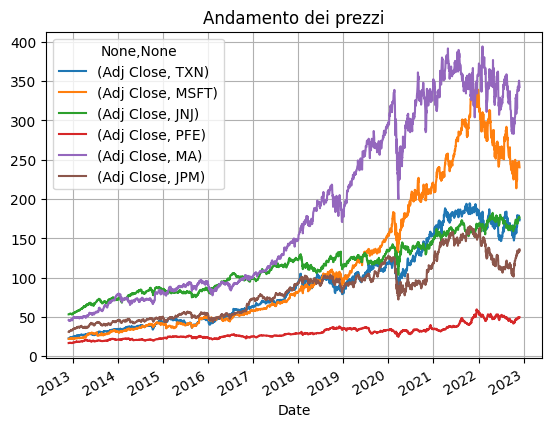

In [4]:
#ottengo il dataframe con tutte le sei azioni selezionate per confrontarle
df = yf.download(['TXN', 'MSFT', 'JNJ', 'PFE', 'MA', 'JPM'], start_date, end_date)
df1 = df[[('Adj Close', 'TXN'), ('Adj Close', 'MSFT'), ('Adj Close', 'JNJ'), ('Adj Close', 'PFE'), ('Adj Close', 'MA'), ('Adj Close', 'JPM')]]
df1.plot(grid=True, title="Andamento dei prezzi")

In [5]:
df1.columns = ['TXN', 'MSFT','JNJ','PFE', 'MA', 'JPM']
df1.head()

TXN       MSFT        JNJ        PFE         MA        JPM
Date                                                                        
2012-11-30  22.582657  21.950117  53.113277  16.596136  45.989491  30.897837
2012-12-03  22.689934  21.793444  53.052338  16.642569  45.798450  30.694769
2012-12-04  22.689934  21.743975  53.212292  16.695635  45.494476  30.514252
2012-12-05  22.881512  21.991344  53.296089  17.007391  44.984398  30.988089
2012-12-06  22.843187  22.040810  53.357002  16.987497  45.255447  31.191179

*STATISTICHE DESCRITTIVE*

In [6]:
#trovo la media dei prezzi mensili di ogni azione
TXN_month = TXN.resample('M').mean()
MSFT_month =  MSFT.resample('M').mean()
JNJ_month = JNJ.resample('M').mean()
PFE_month = PFE.resample('M').mean()
MA_month = MA.resample('M').mean()
JPM_month = JPM.resample('M').mean()

#trovo i ritorni seplici mensili di ogni azione
TXN_month_return = TXN_month['Adj Close'].pct_change().dropna()
MSFT_month_return = MSFT_month['Adj Close'].pct_change().dropna()
JNJ_month_return = JNJ_month['Adj Close'].pct_change().dropna()
PFE_month_return = PFE_month['Adj Close'].pct_change().dropna()
MA_month_return = MA_month['Adj Close'].pct_change().dropna()
JPM_month_return = JPM_month['Adj Close'].pct_change().dropna()

<AxesSubplot: title={'center': 'Simple return Texas Instrumets'}, xlabel='Date'>

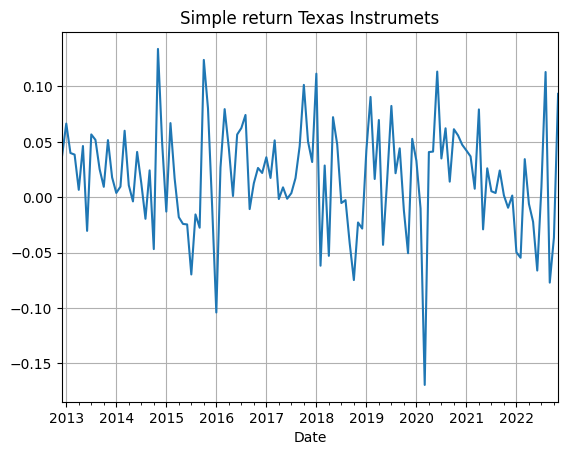

In [7]:
TXN_month_return.plot(grid=True, title="Simple return Texas Instrumets")

<AxesSubplot: title={'center': 'Simple return Microsoft'}, xlabel='Date'>

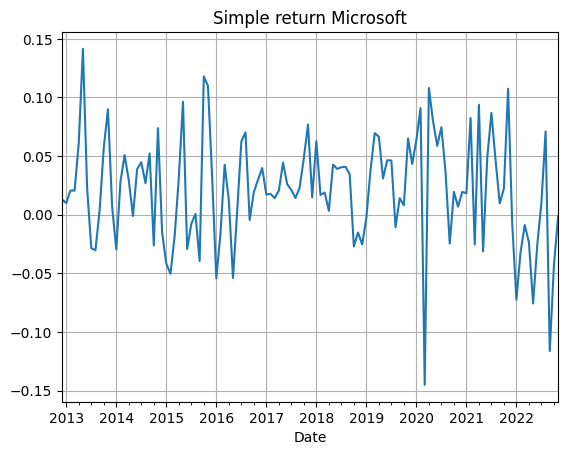

In [8]:
MSFT_month_return.plot(grid=True, title="Simple return Microsoft")

<AxesSubplot: title={'center': 'Simple return Jonson & Jonson'}, xlabel='Date'>

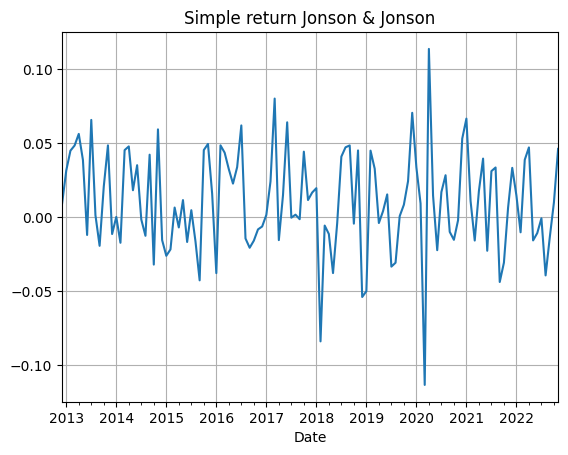

In [9]:
JNJ_month_return.plot(grid=True, title="Simple return Jonson & Jonson")

<AxesSubplot: title={'center': 'Simple return Pfizer'}, xlabel='Date'>

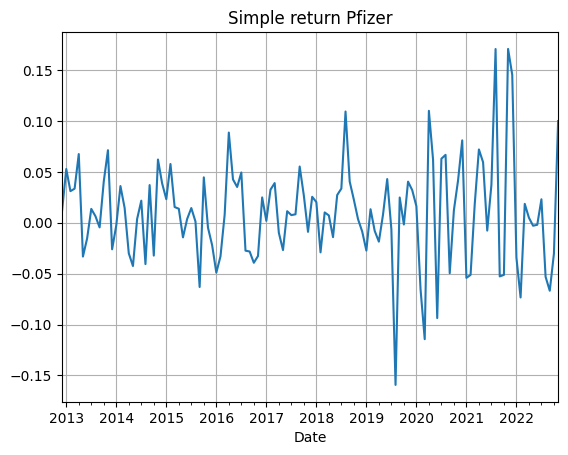

In [10]:
PFE_month_return.plot(grid=True, title="Simple return Pfizer")

<AxesSubplot: title={'center': 'Simple return Mastercard'}, xlabel='Date'>

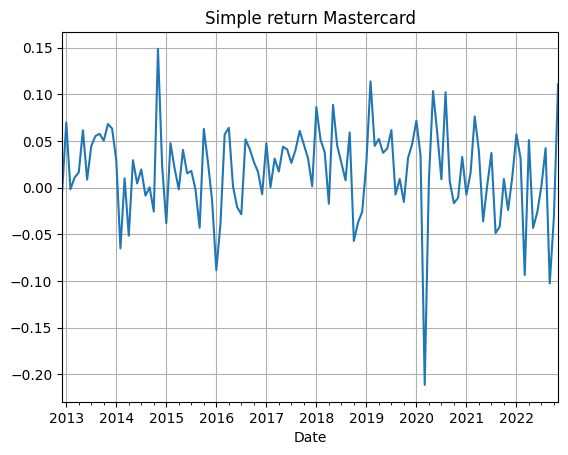

In [11]:
MA_month_return.plot(grid=True, title="Simple return Mastercard")

<AxesSubplot: title={'center': 'Simple return J.P. Morgan'}, xlabel='Date'>

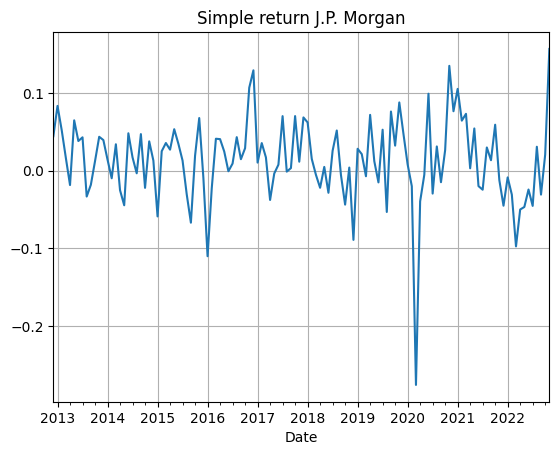

In [12]:
JPM_month_return.plot(grid=True, title="Simple return J.P. Morgan")

In [13]:
#trovo la media dei prezzi annui di ogni azione
TXN_year = TXN.groupby(pd.Grouper(freq="Y")).mean()
MSFT_year = MSFT.groupby(pd.Grouper(freq="Y")).mean()
JNJ_year = JNJ.groupby(pd.Grouper(freq="Y")).mean()
PFE_year = PFE.groupby(pd.Grouper(freq="Y")).mean()
MA_year = MA.groupby(pd.Grouper(freq="Y")).mean()
JPM_year = JPM.groupby(pd.Grouper(freq="Y")).mean()

#trovo i ritorni seplici annui di ogni azione
TXN_year_return = TXN_year['Adj Close'].pct_change().dropna()
MSFT_year_return = MSFT_year['Adj Close'].pct_change().dropna()
JNJ_year_return = JNJ_year['Adj Close'].pct_change().dropna()
PFE_year_return = PFE_year['Adj Close'].pct_change().dropna()
MA_year_return = MA_year['Adj Close'].pct_change().dropna()
JPM_year_return = JPM_year['Adj Close'].pct_change().dropna()

#trovo i ritorni cumulati annui di ogni azione (utilizzando i rendimenti lordi)
TXN_cum_return = np.cumprod(1+TXN_year_return)
MSFT_cum_return = np.cumprod(1+MSFT_year_return)
JNJ_cum_return = np.cumprod(1+JNJ_year_return)
PFE_cum_return = np.cumprod(1+PFE_year_return)
MA_cum_return = np.cumprod(1+MA_year_return)
JPM_cum_return = np.cumprod(1+JPM_year_return)

print("Ritorno cumulato annuo TXN:", TXN_cum_return[-1])
print("Ritorno cumulato annuo MSFT:", MSFT_cum_return[-1])
print("Ritorno cumulato annuo JNJ:", JNJ_cum_return[-1])
print("Ritorno cumulato annuo PFE:", PFE_cum_return[-1])
print("Ritorno cumulato annuo MA:", MA_cum_return[-1])
print("Ritorno cumulato annuo JPM:", JPM_cum_return[-1])

Ritorno cumulato annuo TXN: 7.14504533191886
Ritorno cumulato annuo MSFT: 12.132434078868144
Ritorno cumulato annuo JNJ: 3.1647840067711805
Ritorno cumulato annuo PFE: 2.909518957719032
Ritorno cumulato annuo MA: 7.401321048386079
Ritorno cumulato annuo JPM: 3.878052403644594


In [14]:
#trovo i ritorni composti annui di ogni azione
TXN_compound_return = TXN_year_return.mean() - 0.5*(TXN_year_return.std())**2
MSFT_compound_return = MSFT_year_return.mean() - 0.5*(MSFT_year_return.std())**2
JNJ_compound_return = JNJ_year_return.mean() - 0.5*(JNJ_year_return.std())**2
PFE_compound_return = PFE_year_return.mean() - 0.5*(PFE_year_return.std())**2
MA_compound_return = MA_year_return.mean() - 0.5*(MA_year_return.std())**2
JPM_compound_return = JPM_year_return.mean() - 0.5*(JPM_year_return.std())**2

print("Ritorno composto TXN:", TXN_compound_return)
print("Ritorno composto MSFT:", MSFT_compound_return)
print("Ritorno composto JNJ:", JNJ_compound_return)
print("Ritorno composto PFE:", PFE_compound_return)
print("Ritorno composto MA:", MA_compound_return)
print("Ritorno composto JPM:", JPM_compound_return)

Ritorno composto TXN: 0.21504788391792998
Ritorno composto MSFT: 0.2803035534449453
Ritorno composto JNJ: 0.12151715494788938
Ritorno composto PFE: 0.11188027758269274
Ritorno composto MA: 0.21846407962548445
Ritorno composto JPM: 0.1404347881186995


In [15]:
#trovo i ritorni logaritmici mensili di ogni azione
TXN_log_return = np.log(TXN_month["Adj Close"]/TXN_month.shift(1)["Adj Close"]).dropna()
MSFT_log_return = np.log(MSFT_month["Adj Close"]/MSFT_month.shift(1)["Adj Close"]).dropna()
JNJ_log_return = np.log(JNJ_month["Adj Close"]/JNJ_month.shift(1)["Adj Close"]).dropna()
PFE_log_return = np.log(PFE_month["Adj Close"]/PFE_month.shift(1)["Adj Close"]).dropna()
MA_log_return = np.log(MA_month["Adj Close"]/MA_month.shift(1)["Adj Close"]).dropna()
JPM_log_return = np.log(JPM_month["Adj Close"]/JPM_month.shift(1)["Adj Close"]).dropna()

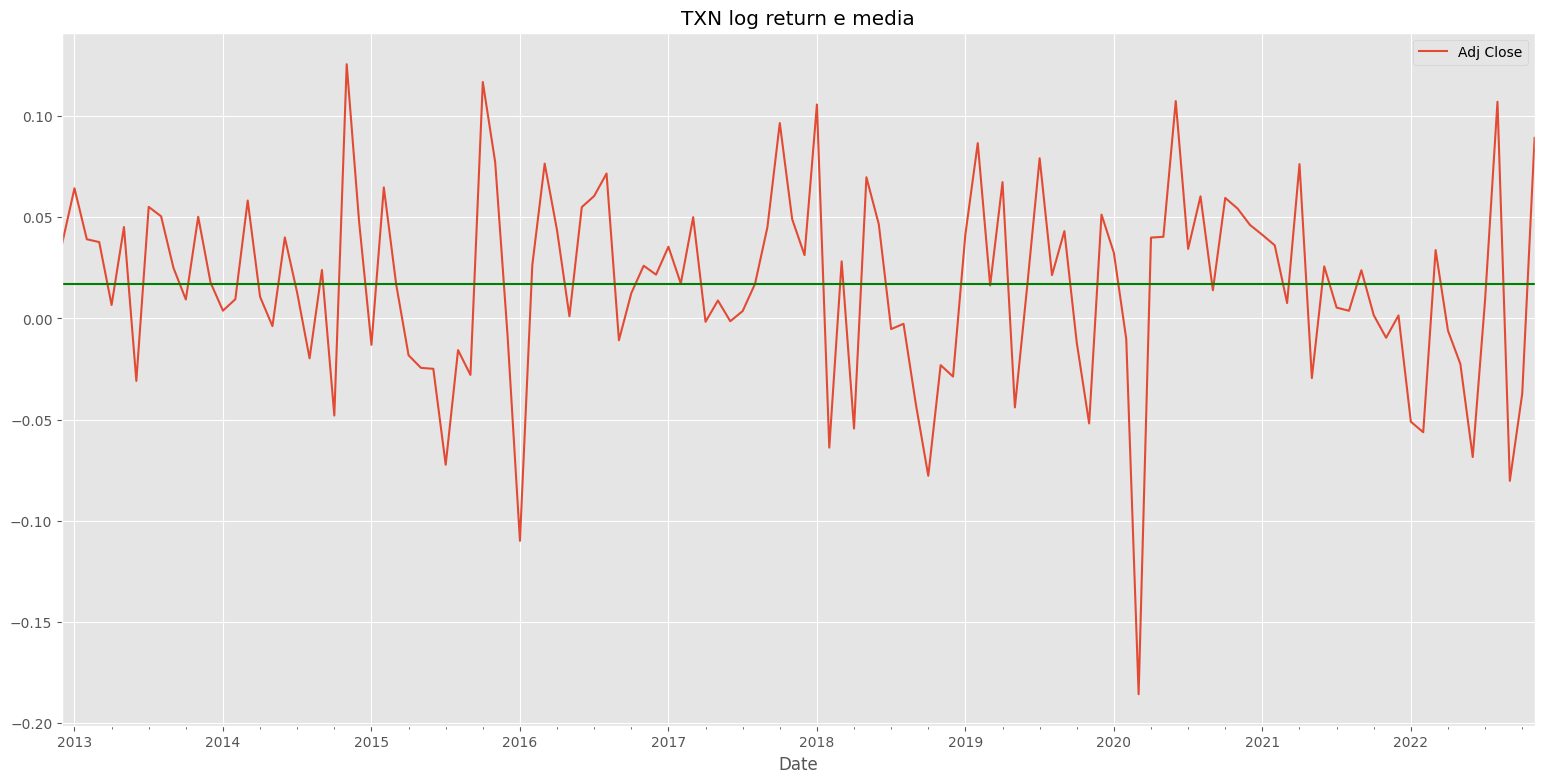

In [16]:
#inserisco in un unico grafico i ritorni logaritmici mensili e la loro media per ogni azione
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
ax = TXN_log_return.plot(figsize=(19,9))
ax.axhline(TXN_log_return.mean(), c='g')
plt.legend(loc = 'best')
plt.title('TXN log return e media')
plt.show()

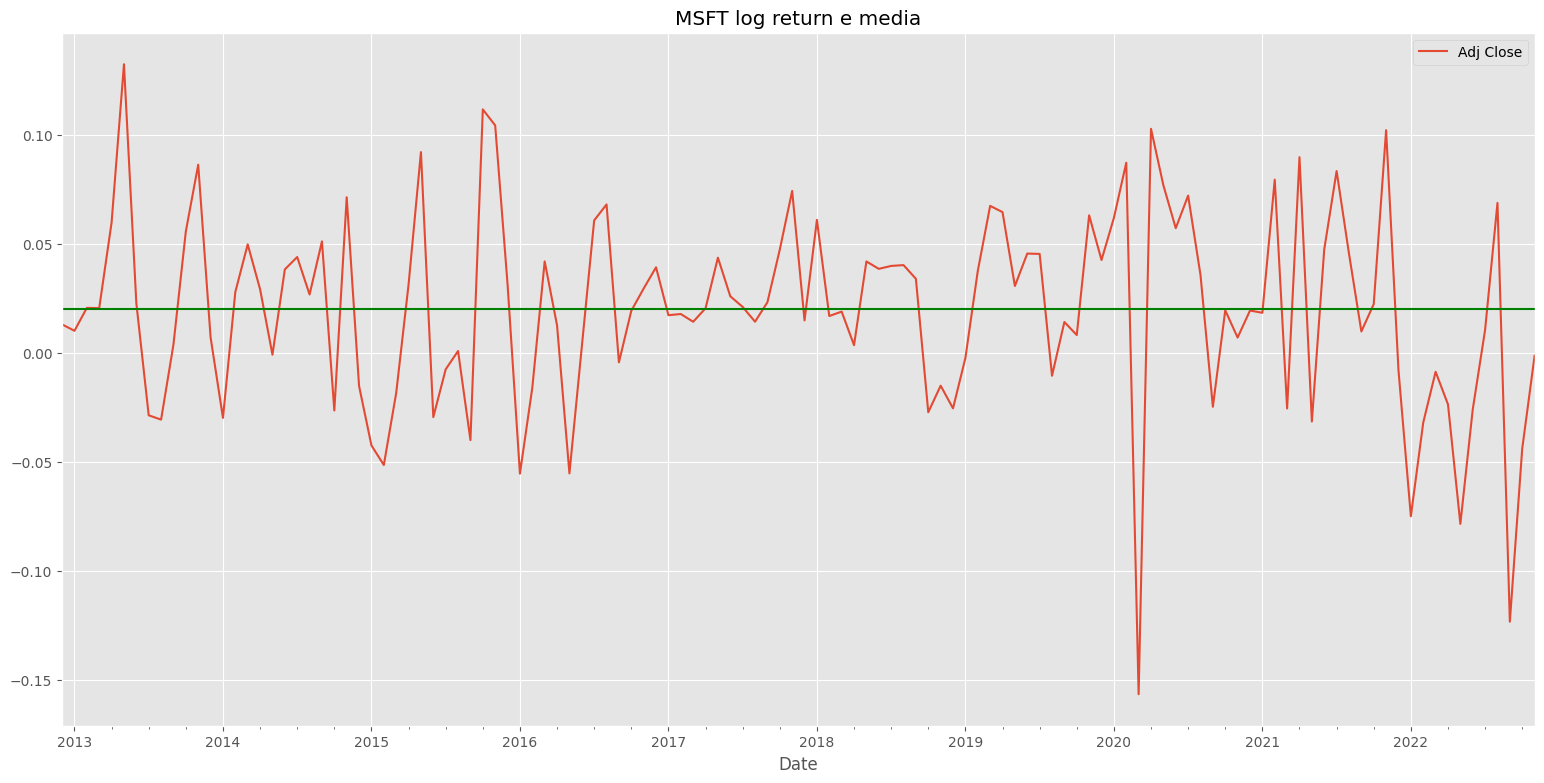

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
ax = MSFT_log_return.plot(figsize=(19,9))
ax.axhline(MSFT_log_return.mean(), c='g')
plt.legend(loc = 'best')
plt.title('MSFT log return e media')
plt.show()

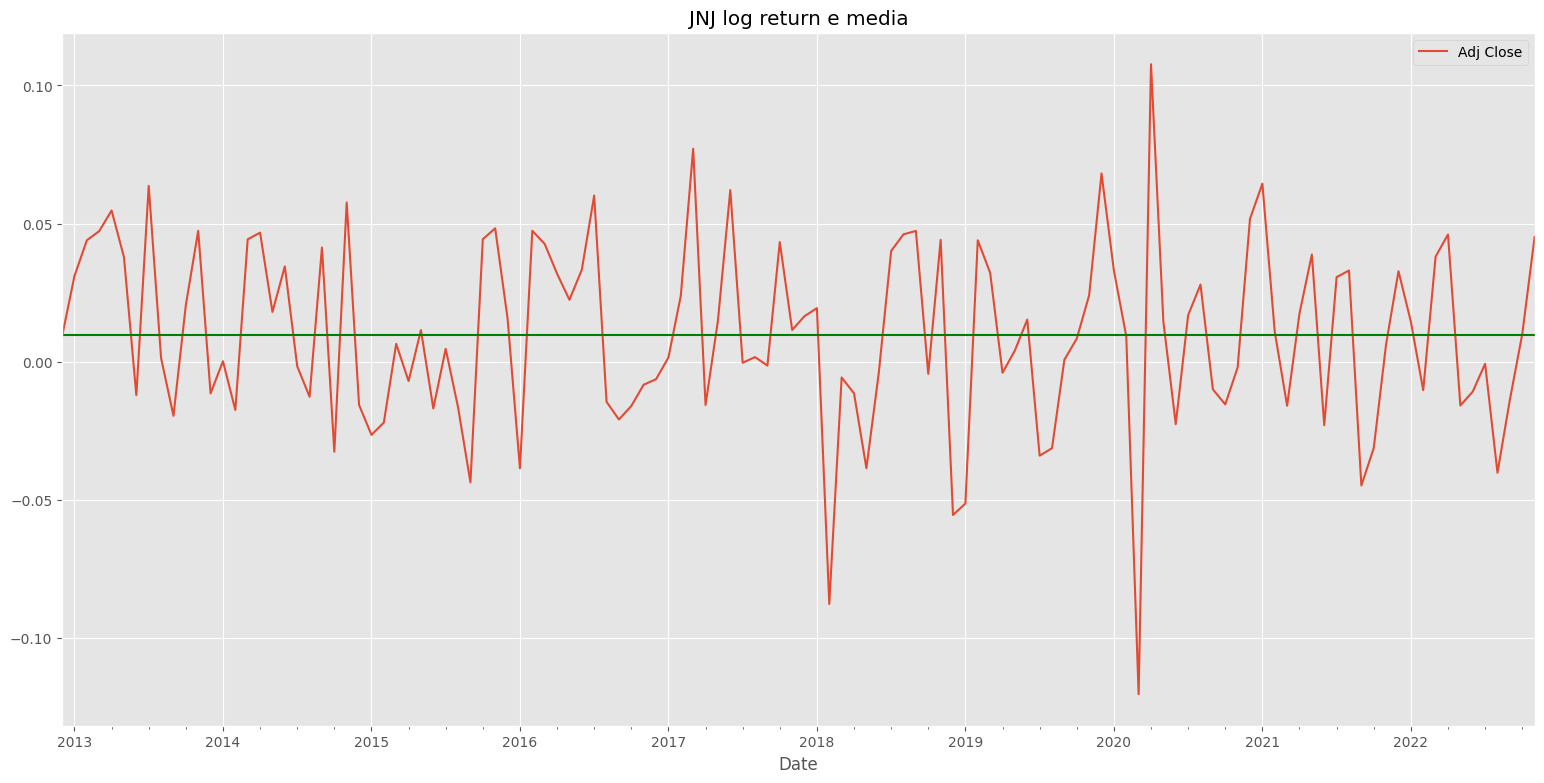

In [18]:
plt.figure(figsize=(16,9))
ax = JNJ_log_return.plot(figsize=(19,9))
ax.axhline(JNJ_log_return.mean(), c='g')
plt.legend(loc = 'best')
plt.title('JNJ log return e media')
plt.show()

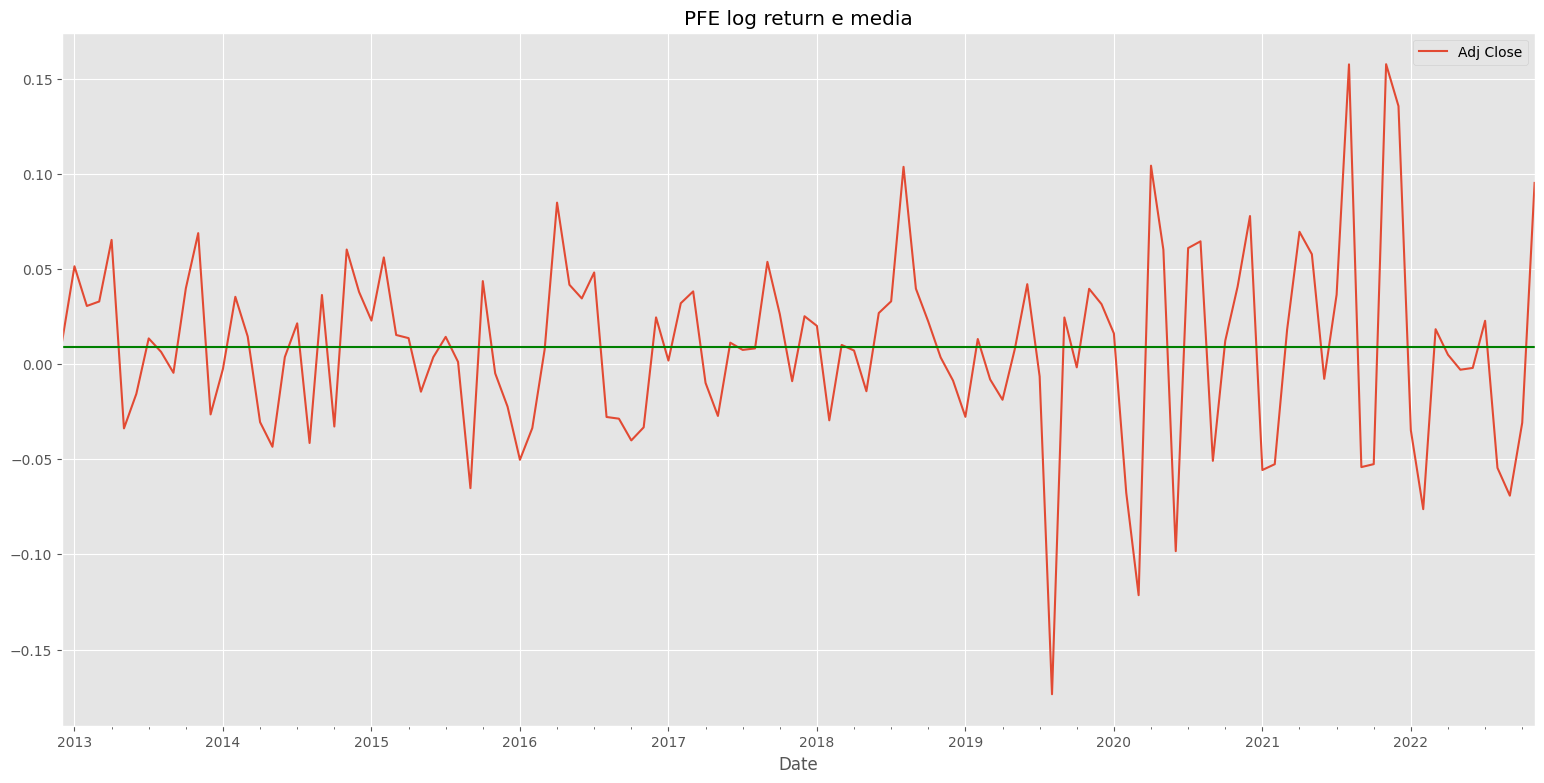

In [19]:
plt.figure(figsize=(16,9))
ax = PFE_log_return.plot(figsize=(19,9))
ax.axhline(PFE_log_return.mean(), c='g')
plt.legend(loc = 'best')
plt.title('PFE log return e media')
plt.show()

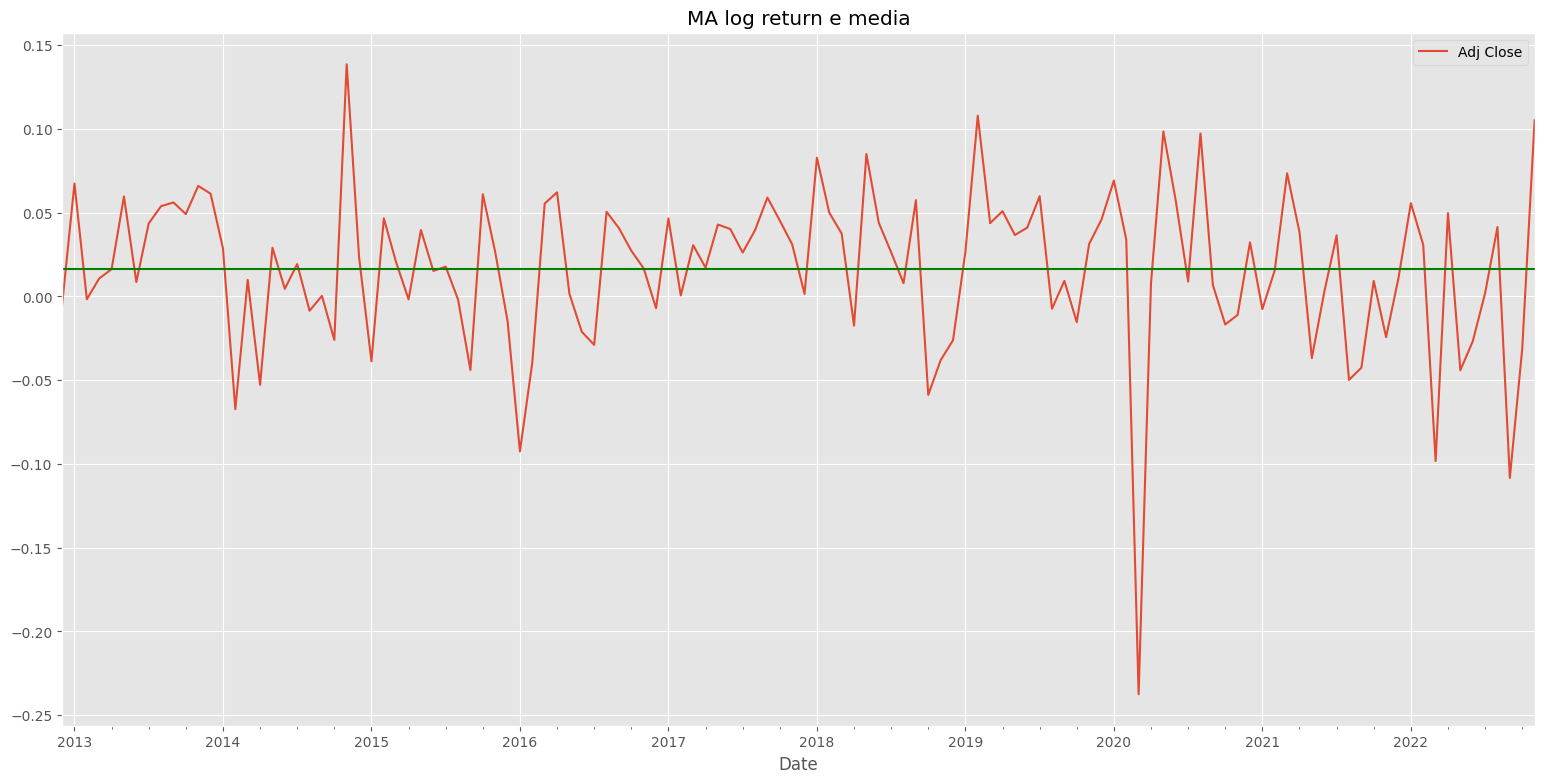

In [20]:
plt.figure(figsize=(16,9))
ax = MA_log_return.plot(figsize=(19,9))
ax.axhline(MA_log_return.mean(), c='g')
plt.legend(loc = 'best')
plt.title('MA log return e media')
plt.show()

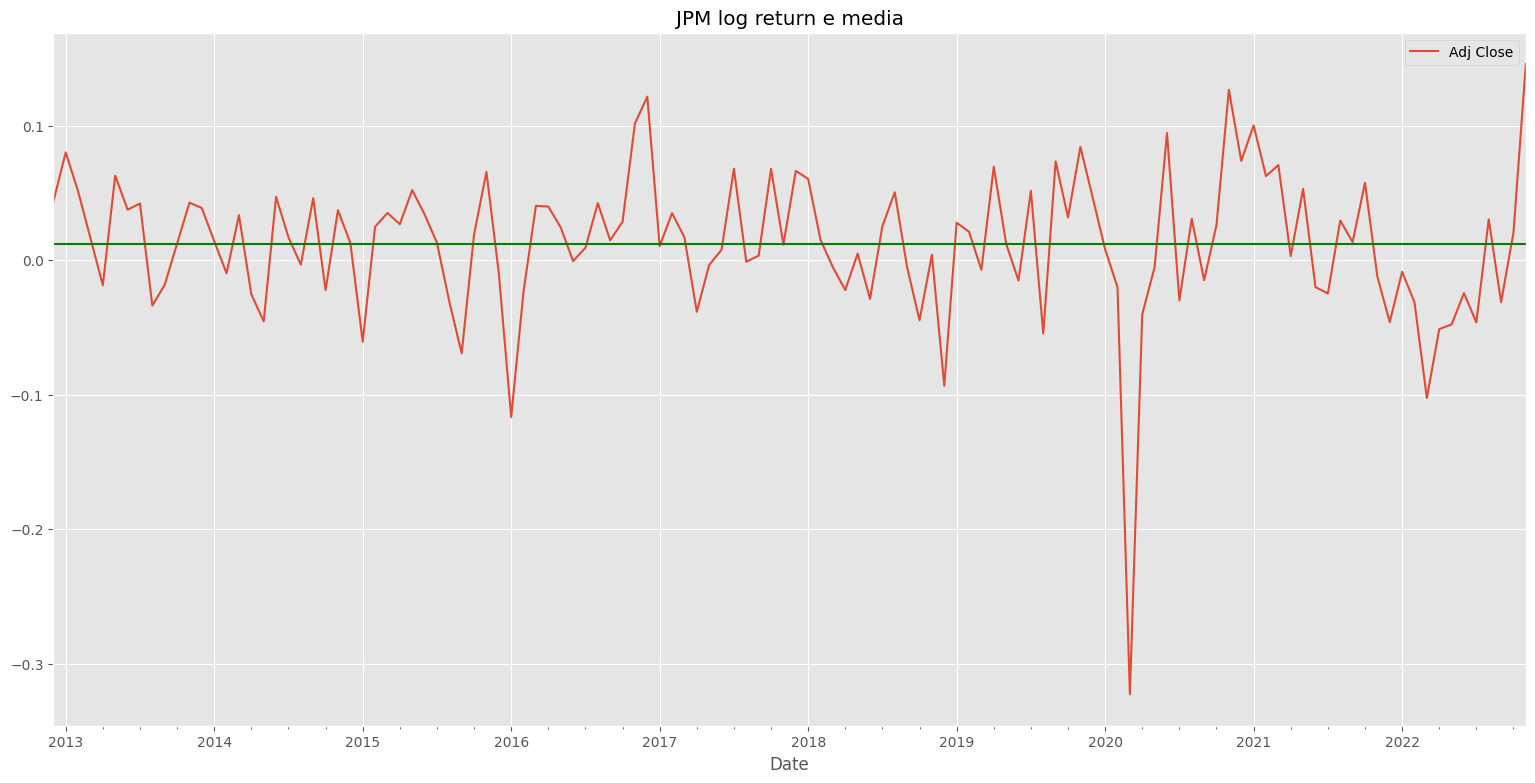

In [21]:
plt.figure(figsize=(16,9))
ax = JPM_log_return.plot(figsize=(19,9))
ax.axhline(JPM_log_return.mean(), c='g')
plt.legend(loc = 'best')
plt.title('JPM log return e media')
plt.show()

GRAFICI DIAGNOSTICI

<AxesSubplot: title={'center': 'Istogramma'}, ylabel='Frequency'>

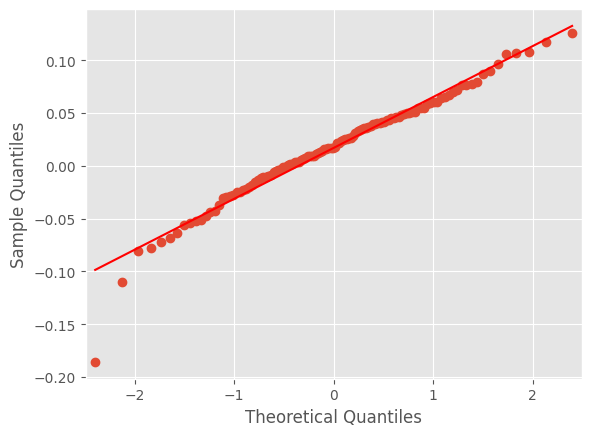

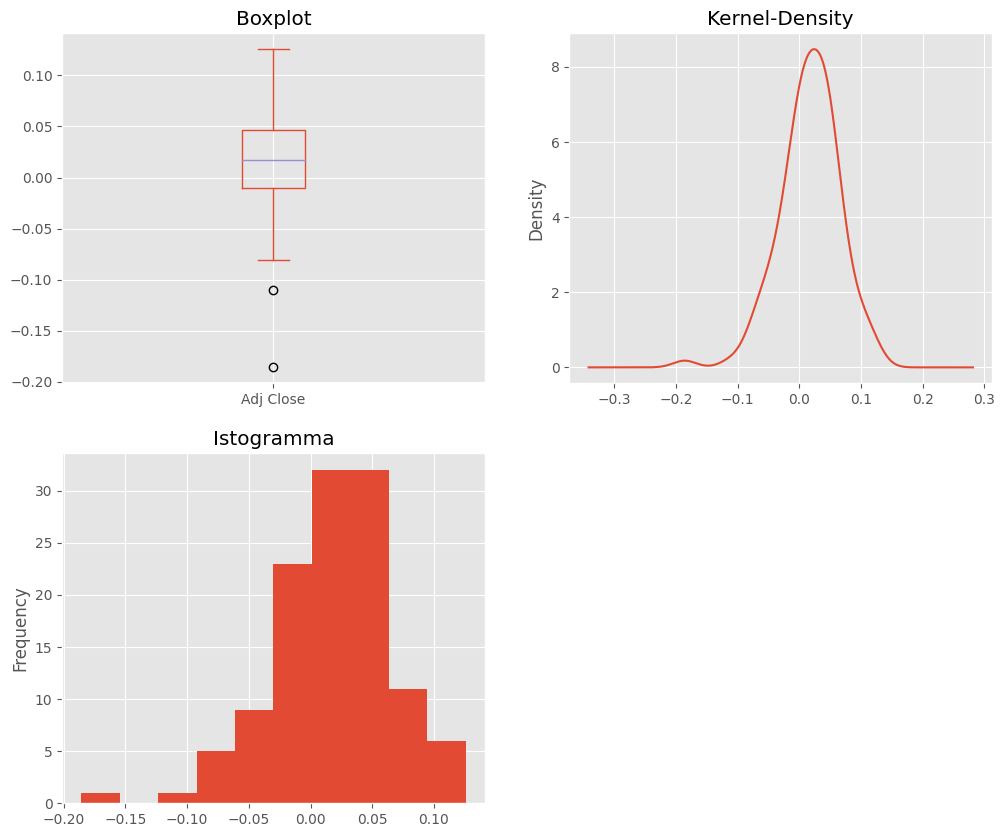

In [22]:
#creo i 4 grafici previsti per ogni serie di rendimenti logaritmici di ogni azione
import statsmodels.api as sm
sm.qqplot(TXN_log_return, line = 's')                                          #QQPLOT
plt.figure(figsize=(12, 10))
plt.subplot(221)
TXN_log_return.plot(kind='box', grid=True, title="Boxplot")                    #BOXPLOT
plt.subplot(222)
TXN_log_return.plot(kind='kde', grid=True, title="Kernel-Density")             #KERNEL-DENSITY
plt.subplot(223)
TXN_log_return.plot(kind='hist', grid=True, title="Istogramma")                #ISTOGRAMMA

<AxesSubplot: title={'center': 'Istogramma'}, ylabel='Frequency'>

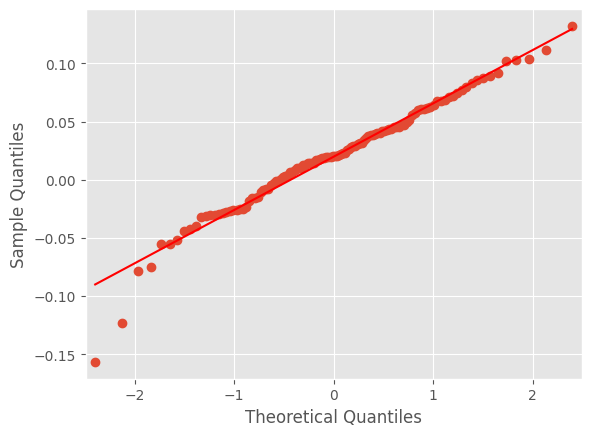

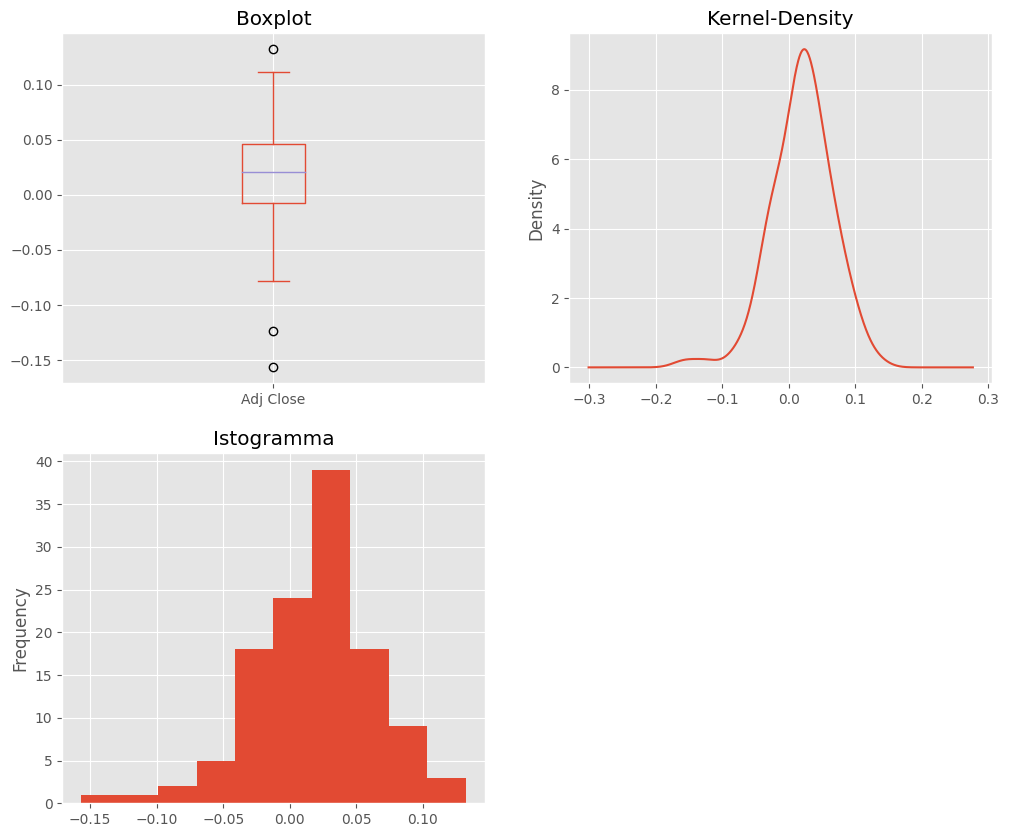

In [23]:
sm.qqplot(MSFT_log_return, line = 's')
plt.figure(figsize=(12, 10))
plt.subplot(221)
MSFT_log_return.plot(kind='box', grid=True, title="Boxplot")
plt.subplot(222)
MSFT_log_return.plot(kind='kde', grid=True, title="Kernel-Density")
plt.subplot(223)
MSFT_log_return.plot(kind='hist', grid=True, title="Istogramma")

<AxesSubplot: title={'center': 'Istogramma'}, ylabel='Frequency'>

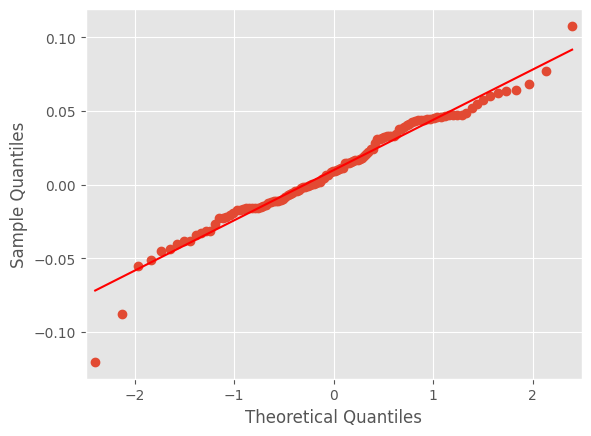

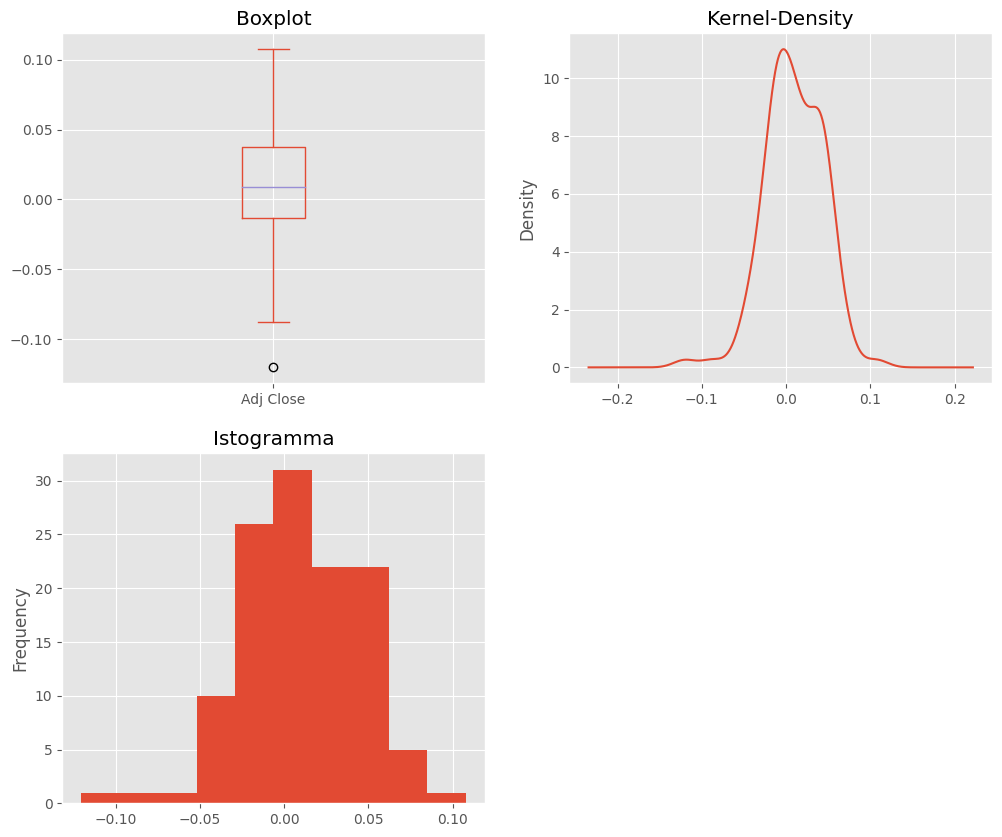

In [24]:
sm.qqplot(JNJ_log_return, line = 's')
plt.figure(figsize=(12, 10))
plt.subplot(221)
JNJ_log_return.plot(kind='box', grid=True, title="Boxplot")
plt.subplot(222)
JNJ_log_return.plot(kind='kde', grid=True, title="Kernel-Density")
plt.subplot(223)
JNJ_log_return.plot(kind='hist', grid=True, title="Istogramma")

<AxesSubplot: title={'center': 'Istogramma'}, ylabel='Frequency'>

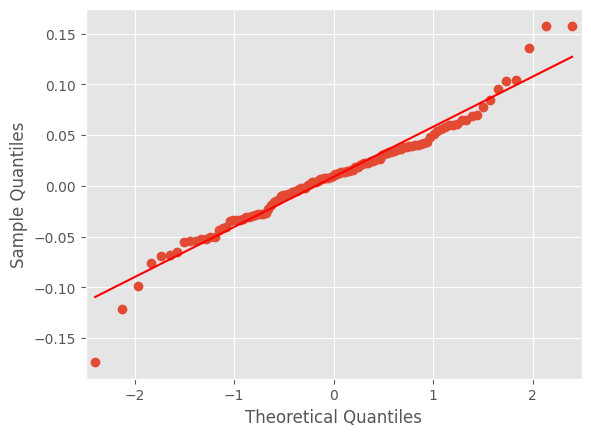

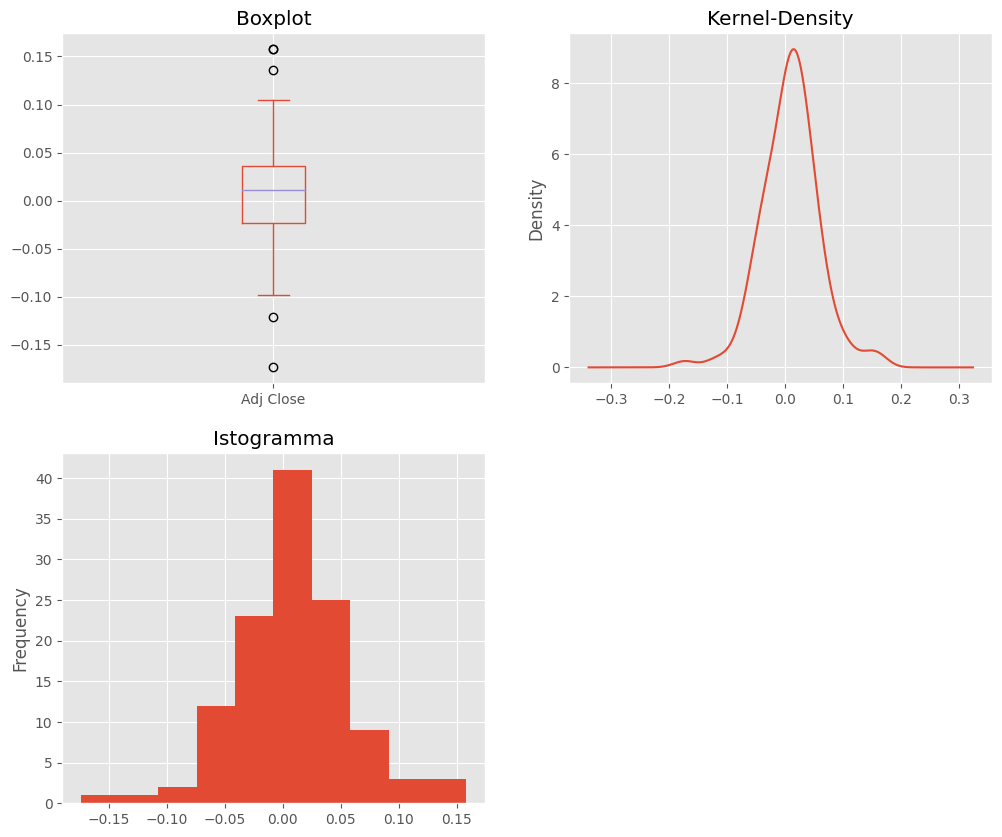

In [25]:
sm.qqplot(PFE_log_return, line = 's')
plt.figure(figsize=(12, 10))
plt.subplot(221)
PFE_log_return.plot(kind='box', grid=True, title="Boxplot")
plt.subplot(222)
PFE_log_return.plot(kind='kde', grid=True, title="Kernel-Density")
plt.subplot(223)
PFE_log_return.plot(kind='hist', grid=True, title="Istogramma")

<AxesSubplot: title={'center': 'Istogramma'}, ylabel='Frequency'>

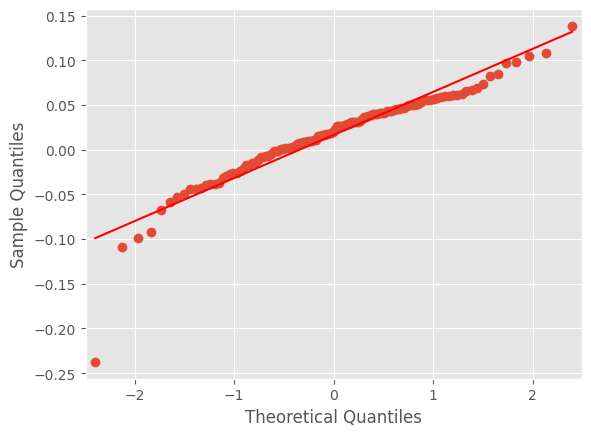

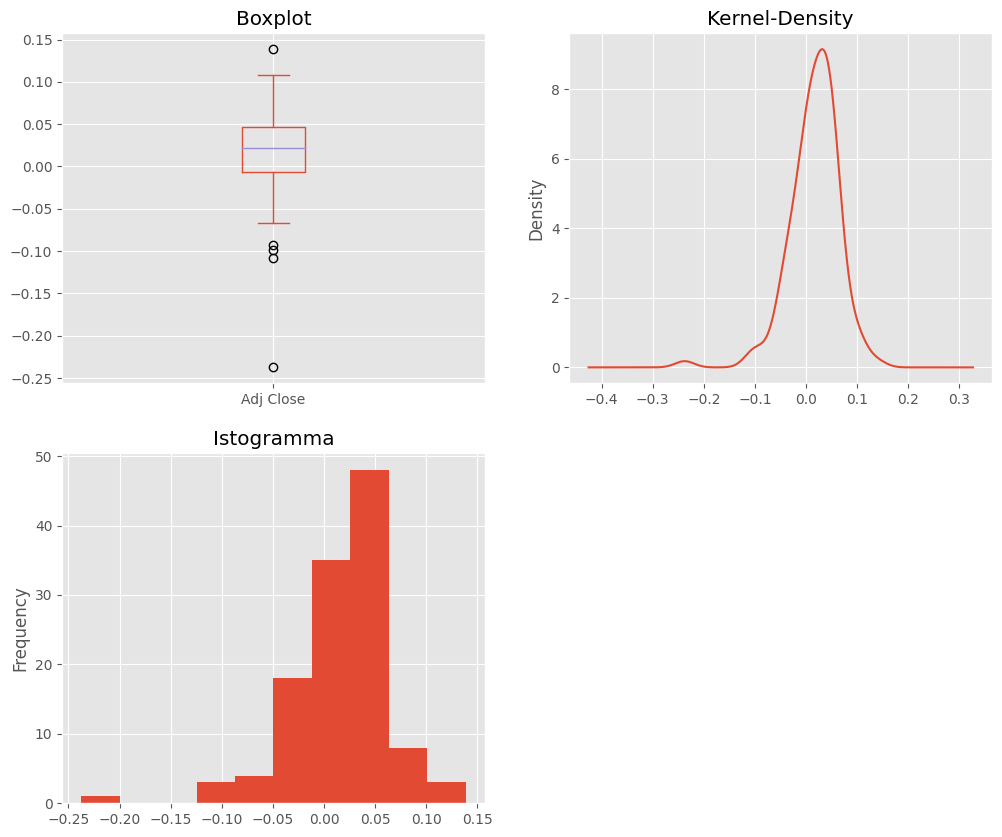

In [26]:
sm.qqplot(MA_log_return, line = 's')
plt.figure(figsize=(12, 10))
plt.subplot(221)
MA_log_return.plot(kind='box', grid=True, title="Boxplot")
plt.subplot(222)
MA_log_return.plot(kind='kde', grid=True, title="Kernel-Density")
plt.subplot(223)
MA_log_return.plot(kind='hist', grid=True, title="Istogramma")

<AxesSubplot: title={'center': 'Istogramma'}, ylabel='Frequency'>

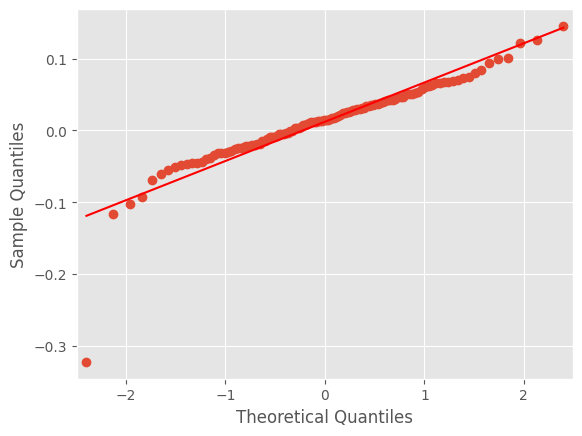

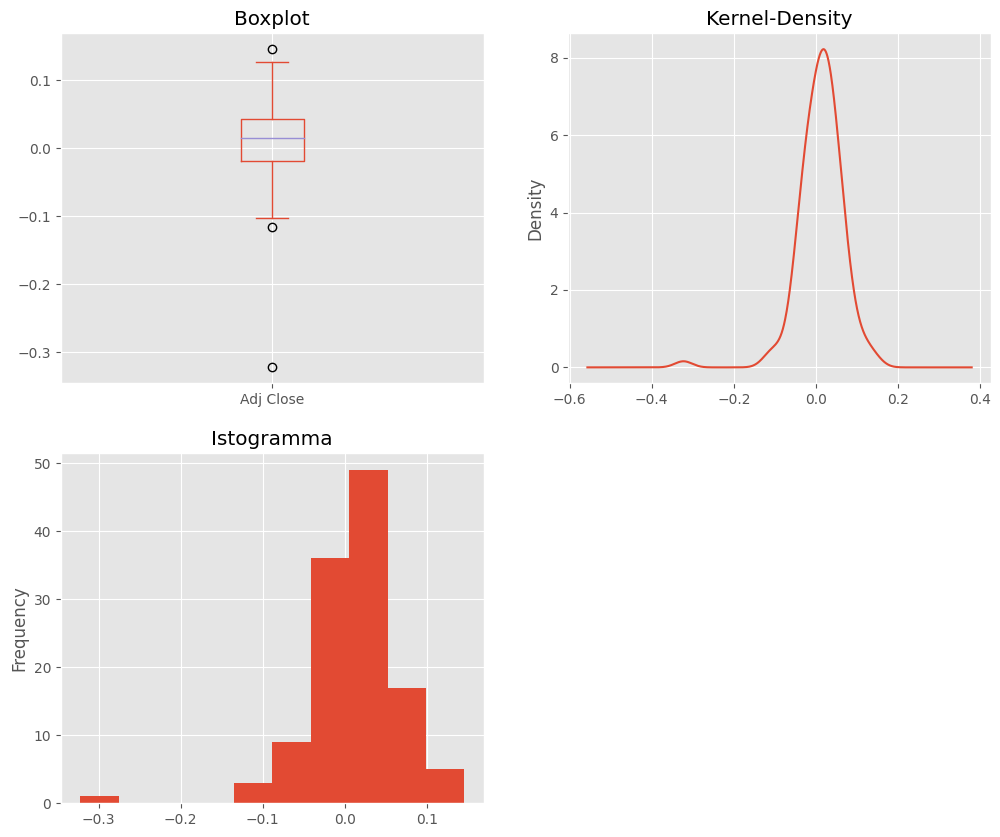

In [27]:
sm.qqplot(JPM_log_return, line = 's')
plt.figure(figsize=(12, 10))
plt.subplot(221)
JPM_log_return.plot(kind='box', grid=True, title="Boxplot")
plt.subplot(222)
JPM_log_return.plot(kind='kde', grid=True, title="Kernel-Density")
plt.subplot(223)
JPM_log_return.plot(kind='hist', grid=True, title="Istogramma")

In [28]:
#Media
print("Media ritorni logaritmici TXN:",round(TXN_log_return.mean(), 4))
print("Media ritorni logaritmici MSFT:",round(MSFT_log_return.mean(), 4))
print("Media ritorni logaritmici JNJ:",round(JNJ_log_return.mean(), 4))
print("Media ritorni logaritmici PFE:",round(PFE_log_return.mean(), 4))
print("Media ritorni logaritmici MA:",round(MA_log_return.mean(), 4))
print("Media ritorni logaritmici JPM:",round(JPM_log_return.mean(), 4))

Media ritorni logaritmici TXN: 0.0169
Media ritorni logaritmici MSFT: 0.0198
Media ritorni logaritmici JNJ: 0.0098
Media ritorni logaritmici PFE: 0.0089
Media ritorni logaritmici MA: 0.0165
Media ritorni logaritmici JPM: 0.0121


In [29]:
#Varianza
print("Varianza ritorni logaritmici TXN:",round(TXN_log_return.var(), 4))
print("Varianza ritorni logaritmici MSFT:",round(MSFT_log_return.var(), 4))
print("Varianza ritorni logaritmici JNJ:",round(JNJ_log_return.var(), 4))
print("Varianza ritorni logaritmici PFE:",round(PFE_log_return.var(), 4))
print("Varianza ritorni logaritmici MA:",round(MA_log_return.var(), 4))
print("Varianza ritorni logaritmici JPM:",round(JPM_log_return.var(), 4))

Varianza ritorni logaritmici TXN: 0.0023
Varianza ritorni logaritmici MSFT: 0.0021
Varianza ritorni logaritmici JNJ: 0.0012
Varianza ritorni logaritmici PFE: 0.0025
Varianza ritorni logaritmici MA: 0.0023
Varianza ritorni logaritmici JPM: 0.003


In [30]:
#Deviazione standard
print("Deviazione standard ritorni logaritmici TXN:",round(TXN_log_return.std(), 4))
print("Deviazione standard ritorni logaritmici MSFT:",round(MSFT_log_return.std(), 4))
print("Deviazione standard ritorni logaritmici JNJ:",round(JNJ_log_return.std(), 4))
print("Deviazione standard ritorni logaritmici PFE:",round(PFE_log_return.std(), 4))
print("Deviazione standard ritorni logaritmici MA:",round(MA_log_return.std(), 4))
print("Deviazione standard ritorni logaritmici JPM:",round(JPM_log_return.std(), 4))

Deviazione standard ritorni logaritmici TXN: 0.0484
Deviazione standard ritorni logaritmici MSFT: 0.046
Deviazione standard ritorni logaritmici JNJ: 0.0342
Deviazione standard ritorni logaritmici PFE: 0.0496
Deviazione standard ritorni logaritmici MA: 0.0484
Deviazione standard ritorni logaritmici JPM: 0.0549


In [31]:
#Asimmetria
print("Asimmetria ritorni logaritmici TXN:",round(TXN_log_return.skew(), 4))
print("Asimmetria ritorni logaritmici MSFT:",round(MSFT_log_return.skew(), 4))
print("Asimmetria ritorni logaritmici JNJ:",round(JNJ_log_return.skew(), 4))
print("Asimmetria ritorni logaritmici PFE:",round(PFE_log_return.skew(), 4))
print("Asimmetria ritorni logaritmici MA:",round(MA_log_return.skew(), 4))
print("Asimmetria ritorni logaritmici JPM:",round(JPM_log_return.skew(), 4))

Asimmetria ritorni logaritmici TXN: -0.6825
Asimmetria ritorni logaritmici MSFT: -0.5692
Asimmetria ritorni logaritmici JNJ: -0.3872
Asimmetria ritorni logaritmici PFE: -0.0414
Asimmetria ritorni logaritmici MA: -1.3574
Asimmetria ritorni logaritmici JPM: -1.8309


In [32]:
#Kurtosi 
print("Kurtosi ritorni logaritmici TXN:",round(TXN_log_return.kurtosis(), 4))
print("Kurtosi ritorni logaritmici MSFT:",round(MSFT_log_return.kurtosis(), 4))
print("Kurtosi ritorni logaritmici JNJ:",round(JNJ_log_return.kurtosis(), 4))
print("Kurtosi ritorni logaritmici PFE:",round(PFE_log_return.kurtosis(), 4))
print("Kurtosi ritorni logaritmici MA:",round(MA_log_return.kurtosis(), 4))
print("Kurtosi ritorni logaritmici JPM:",round(JPM_log_return.kurtosis(), 4))

Kurtosi ritorni logaritmici TXN: 1.9372
Kurtosi ritorni logaritmici MSFT: 1.5556
Kurtosi ritorni logaritmici JNJ: 1.2309
Kurtosi ritorni logaritmici PFE: 1.9714
Kurtosi ritorni logaritmici MA: 5.8159
Kurtosi ritorni logaritmici JPM: 10.8416


In [33]:
#ottengo la marice di covarianza
df4_log_return = np.log(df1/df1.shift(1)).dropna()
df4_log_return.cov()

TXN      MSFT       JNJ       PFE        MA       JPM
TXN   0.000294  0.000182  0.000079  0.000081  0.000172  0.000150
MSFT  0.000182  0.000288  0.000080  0.000085  0.000182  0.000136
JNJ   0.000079  0.000080  0.000124  0.000084  0.000085  0.000081
PFE   0.000081  0.000085  0.000084  0.000190  0.000094  0.000096
MA    0.000172  0.000182  0.000085  0.000094  0.000295  0.000171
JPM   0.000150  0.000136  0.000081  0.000096  0.000171  0.000285

In [34]:
#ottengo la marice di correlazione
cor=df4_log_return.corr()
cor

TXN      MSFT       JNJ       PFE        MA       JPM
TXN   1.000000  0.624553  0.411630  0.343311  0.583831  0.518163
MSFT  0.624553  1.000000  0.422886  0.362172  0.624319  0.475360
JNJ   0.411630  0.422886  1.000000  0.546408  0.444948  0.429589
PFE   0.343311  0.362172  0.546408  1.000000  0.396163  0.412734
MA    0.583831  0.624319  0.444948  0.396163  1.000000  0.590256
JPM   0.518163  0.475360  0.429589  0.412734  0.590256  1.000000

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli TXN e MSFT')

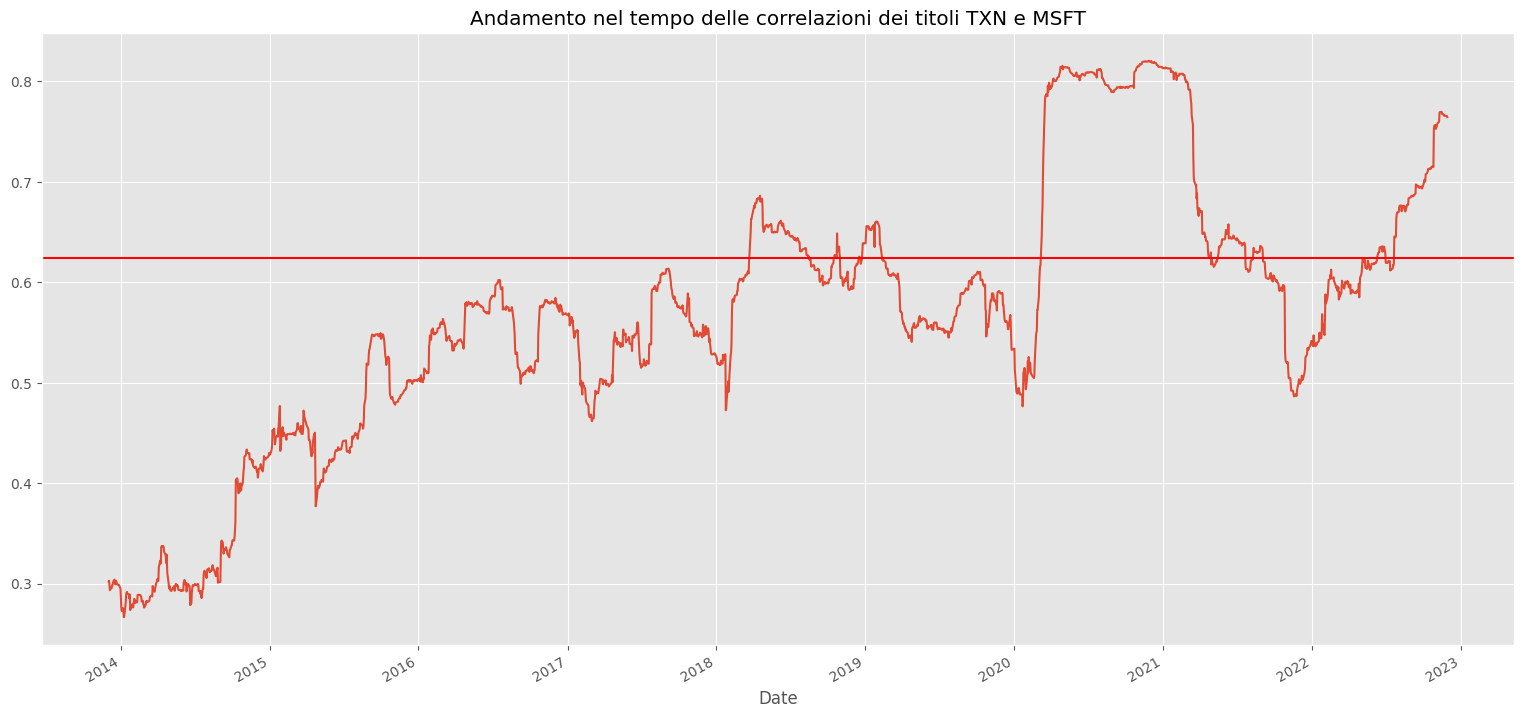

In [35]:
#mostro il grafico dell'andamento della correlazione di ogni coppia di azioni e la loro media presa dalla matrice di correlaizone
ax = df4_log_return['TXN'].rolling(252).corr(df4_log_return['MSFT']).plot(figsize=(19,9))
ax.axhline(cor.iloc[0, 1], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli TXN e MSFT')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli TXN e JNJ')

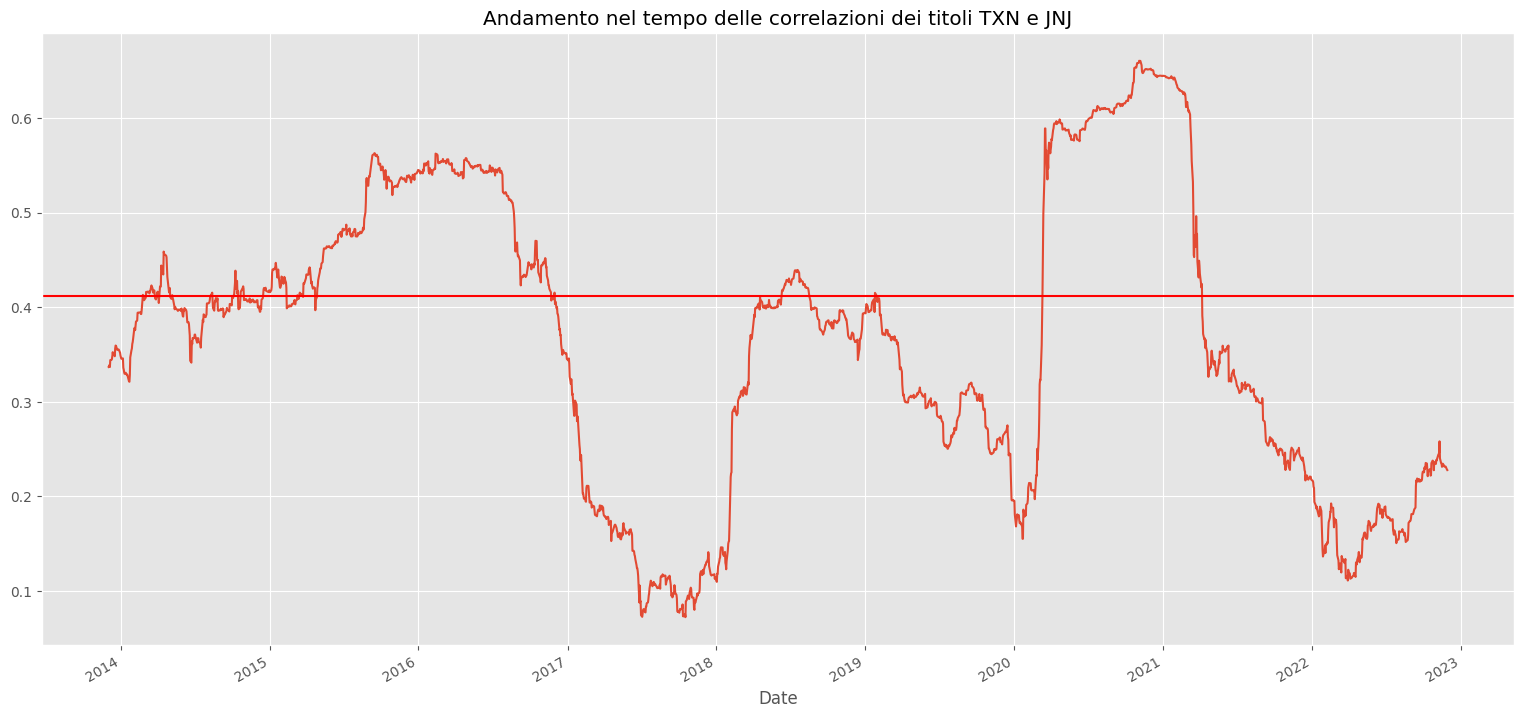

In [36]:
ax = df4_log_return['TXN'].rolling(252).corr(df4_log_return['JNJ']).plot(figsize=(19,9))
ax.axhline(cor.iloc[0, 2], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli TXN e JNJ')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli TXN e PFE')

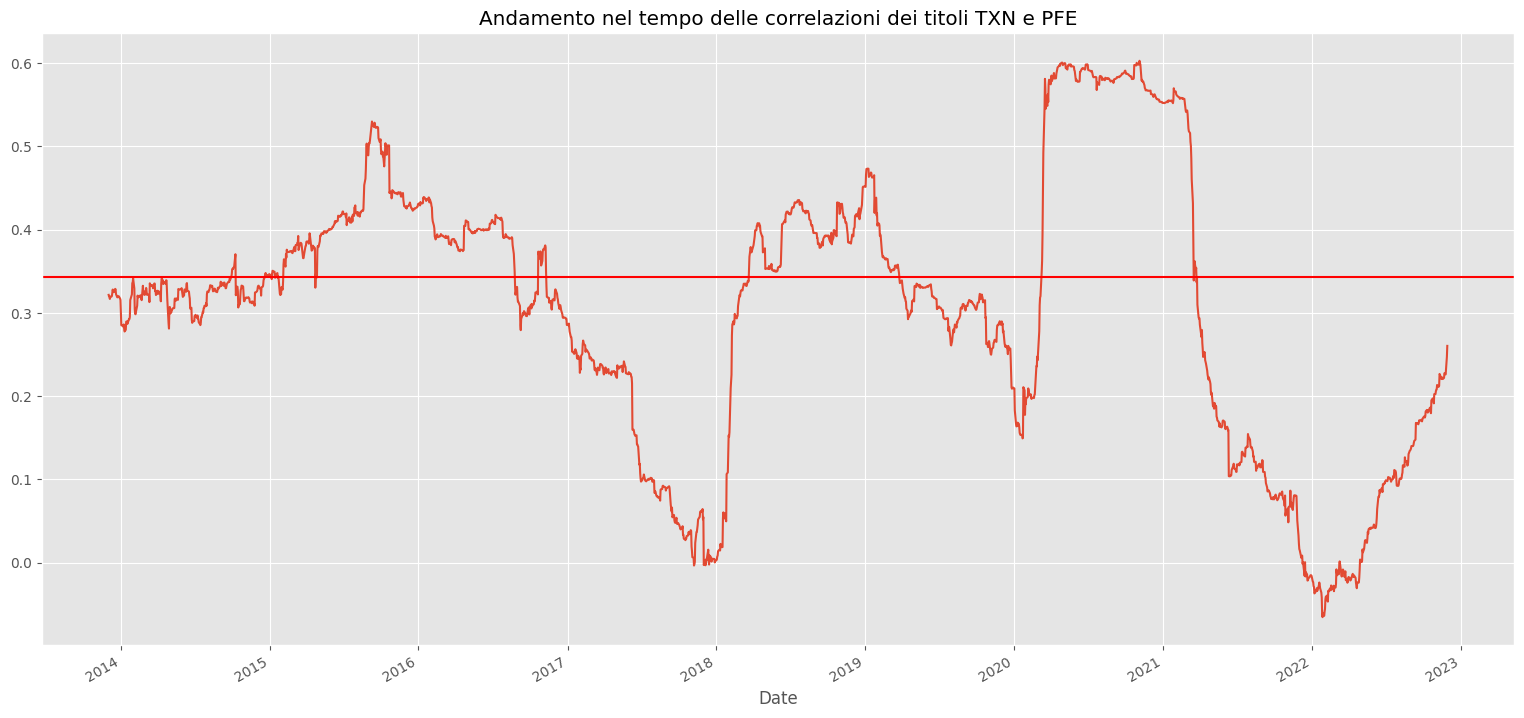

In [37]:
ax = df4_log_return['PFE'].rolling(252).corr(df4_log_return['TXN']).plot(figsize=(19,9))
ax.axhline(cor.iloc[0, 3], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli TXN e PFE')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli TXN e MA')

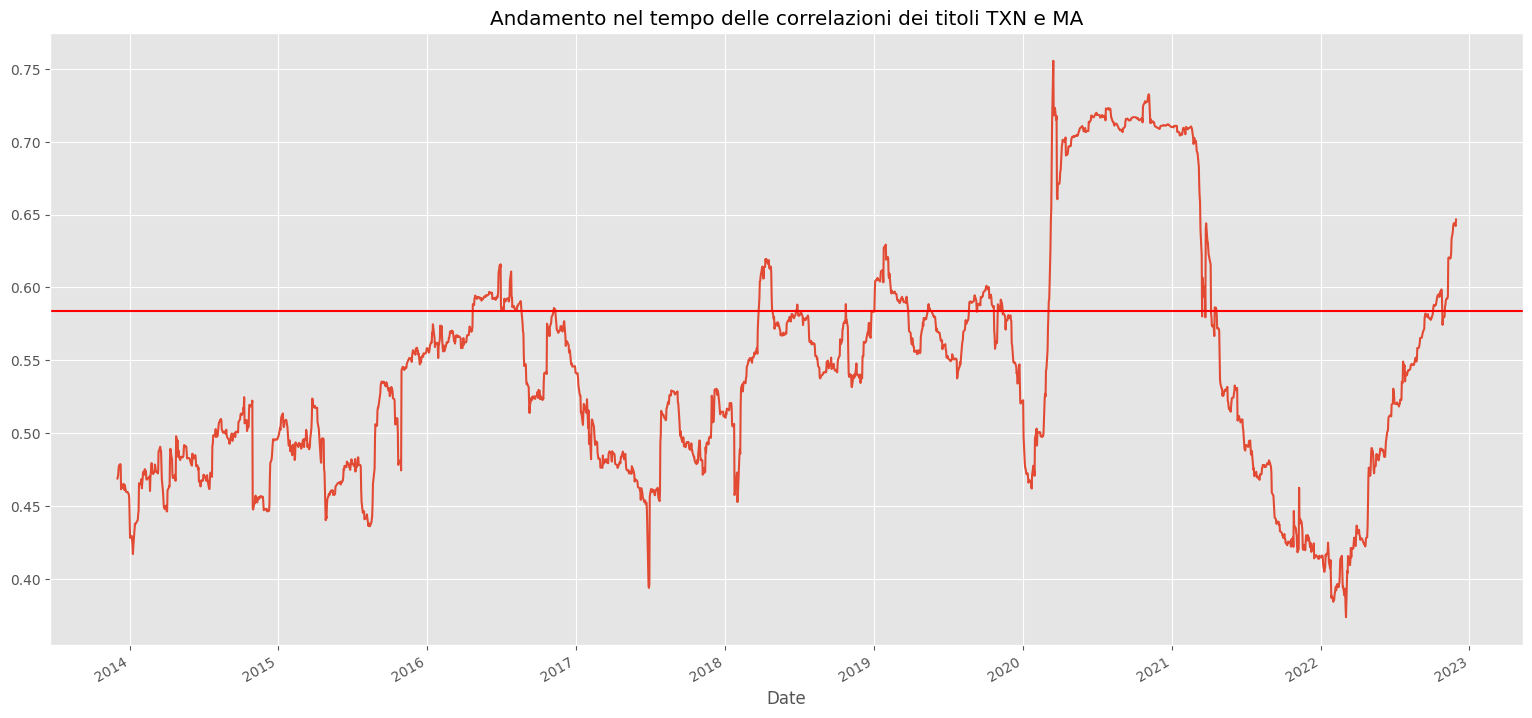

In [38]:
ax = df4_log_return['MA'].rolling(252).corr(df4_log_return['TXN']).plot(figsize=(19,9))
ax.axhline(cor.iloc[0, 4], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli TXN e MA')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli PFE e MSFT')

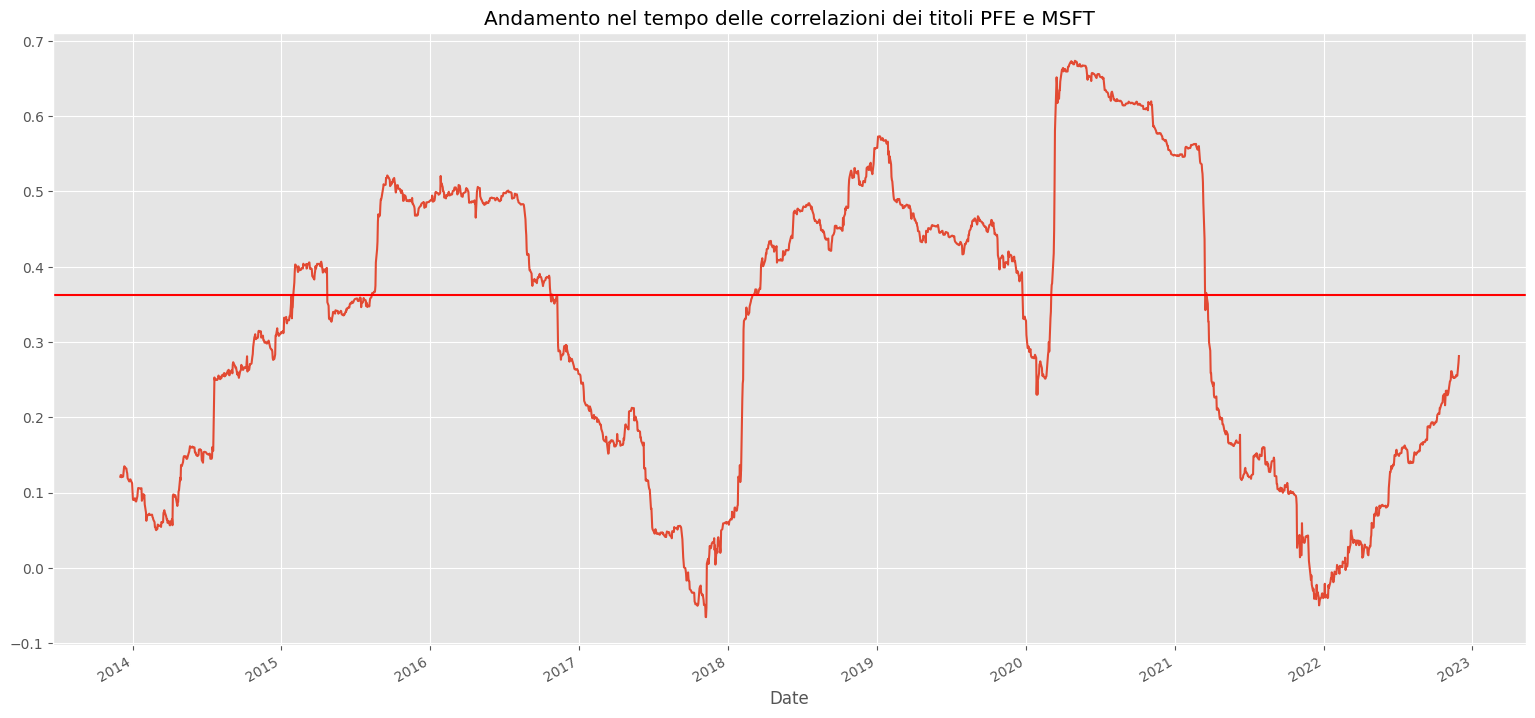

In [39]:
ax = df4_log_return['PFE'].rolling(252).corr(df4_log_return['MSFT']).plot(figsize=(19,9))
ax.axhline(cor.iloc[1, 3], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli PFE e MSFT')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli JNJ e MSFT')

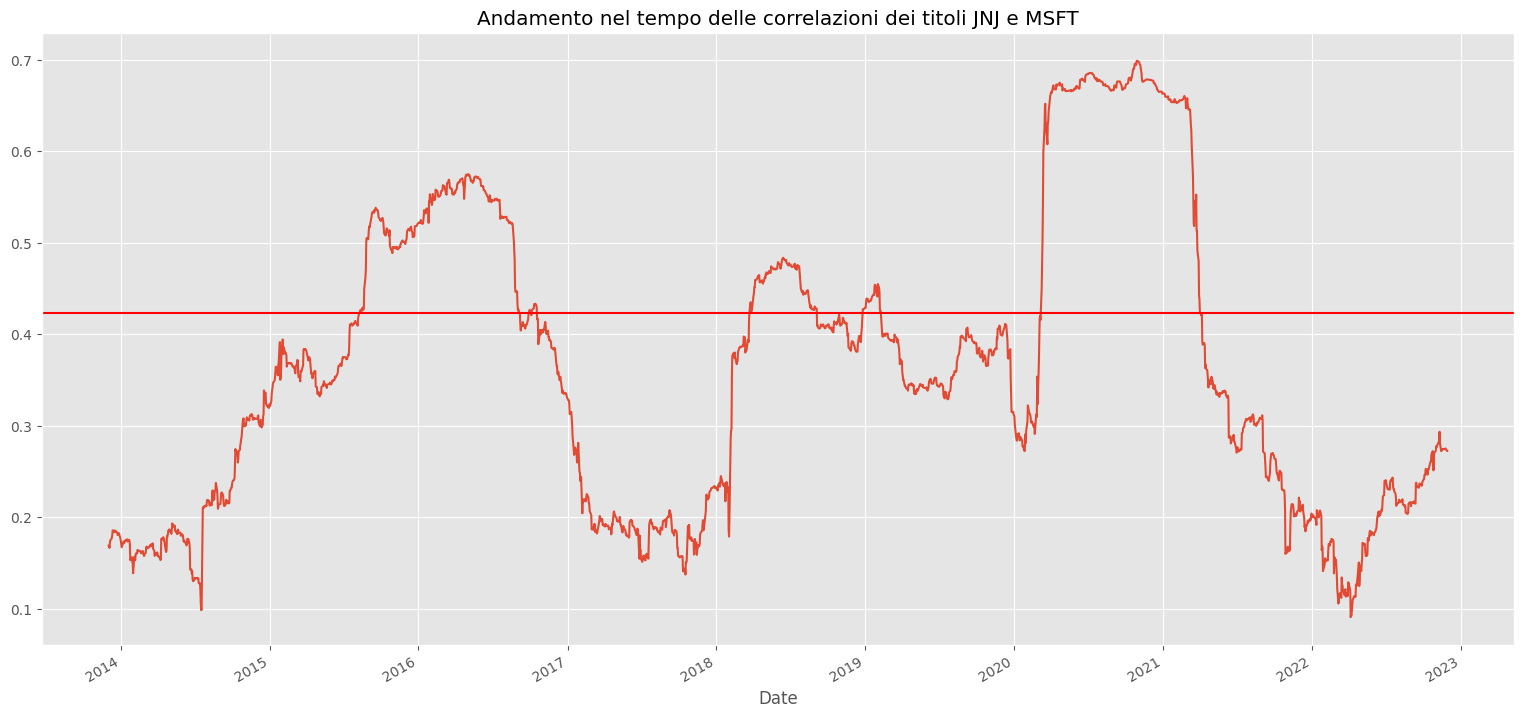

In [40]:
ax = df4_log_return['JNJ'].rolling(252).corr(df4_log_return['MSFT']).plot(figsize=(19,9))
ax.axhline(cor.iloc[1, 2], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli JNJ e MSFT')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli MSFT e JPM')

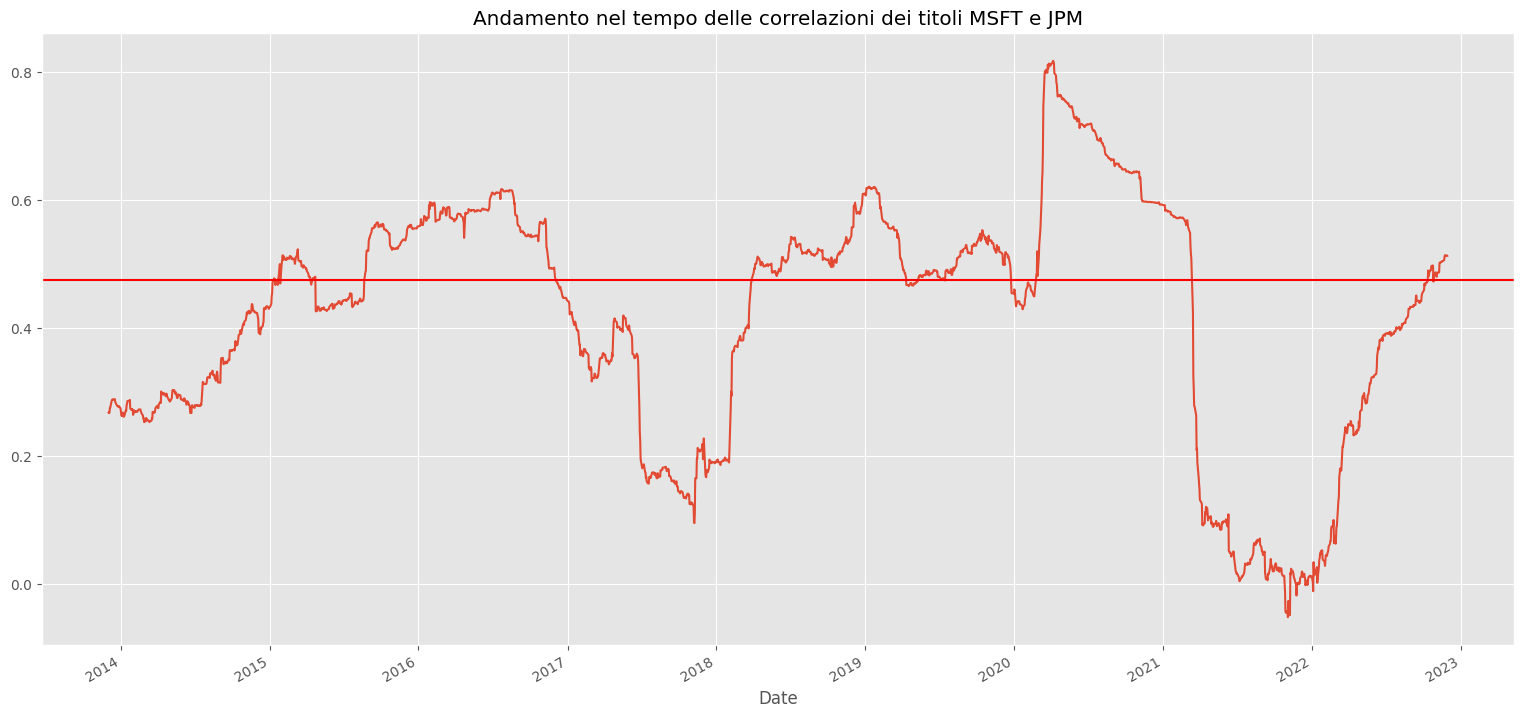

In [41]:
ax = df4_log_return['MSFT'].rolling(252).corr(df4_log_return['JPM']).plot(figsize=(19,9))
ax.axhline(cor.iloc[1, 5], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli MSFT e JPM')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli MSFT e MA')

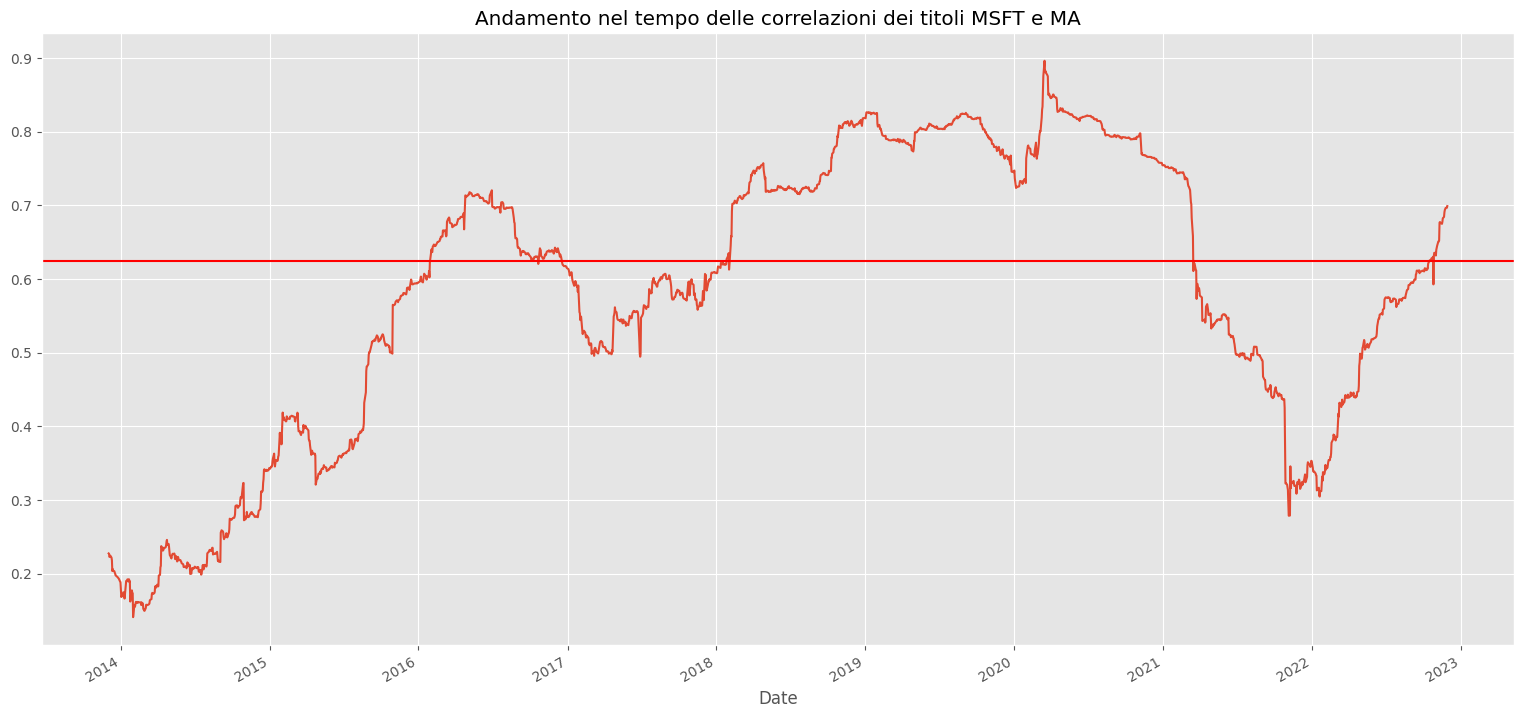

In [42]:
ax = df4_log_return['MSFT'].rolling(252).corr(df4_log_return['MA']).plot(figsize=(19,9))
ax.axhline(cor.iloc[1, 4], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli MSFT e MA')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli TXN e JPM')

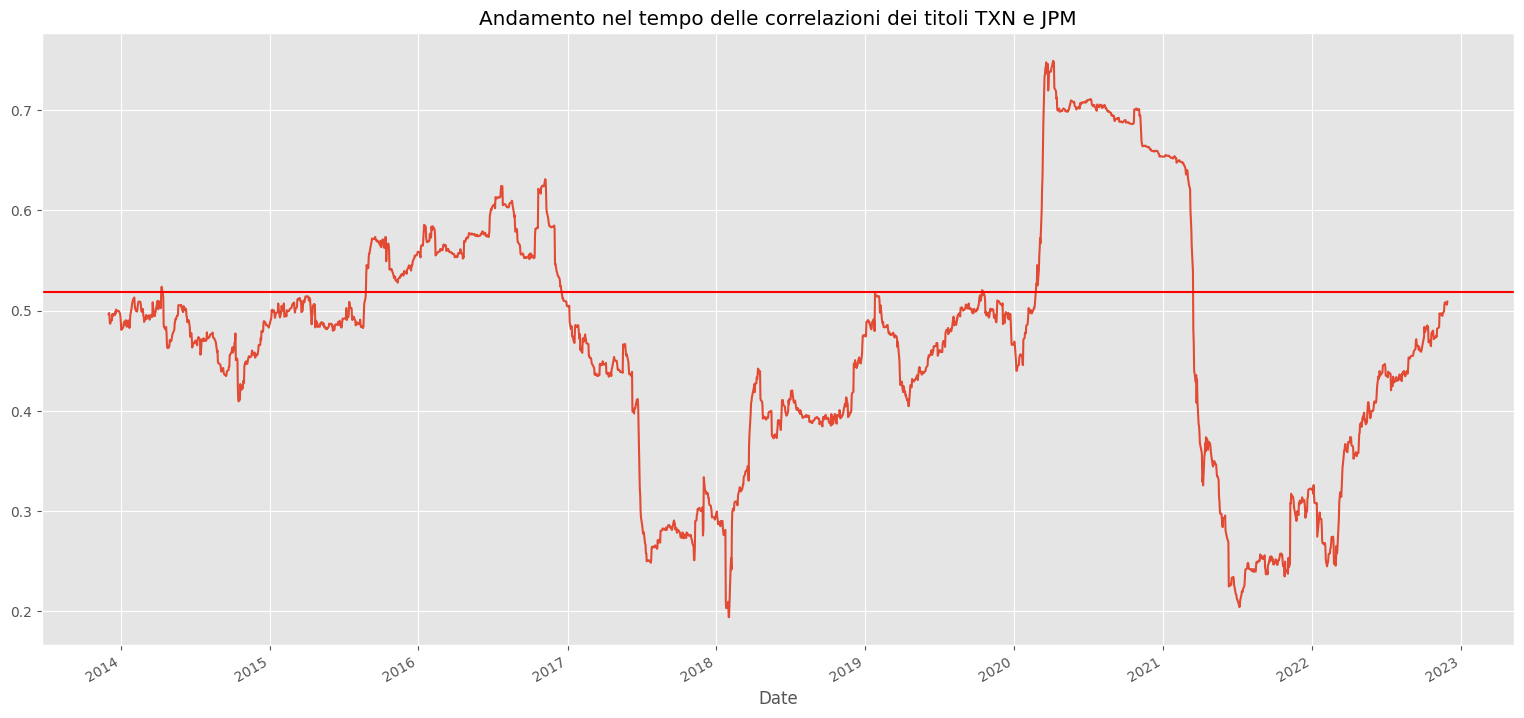

In [43]:
ax = df4_log_return['JPM'].rolling(252).corr(df4_log_return['TXN']).plot(figsize=(19,9))
ax.axhline(cor.iloc[0, 5], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli TXN e JPM')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli JNJ e MA')

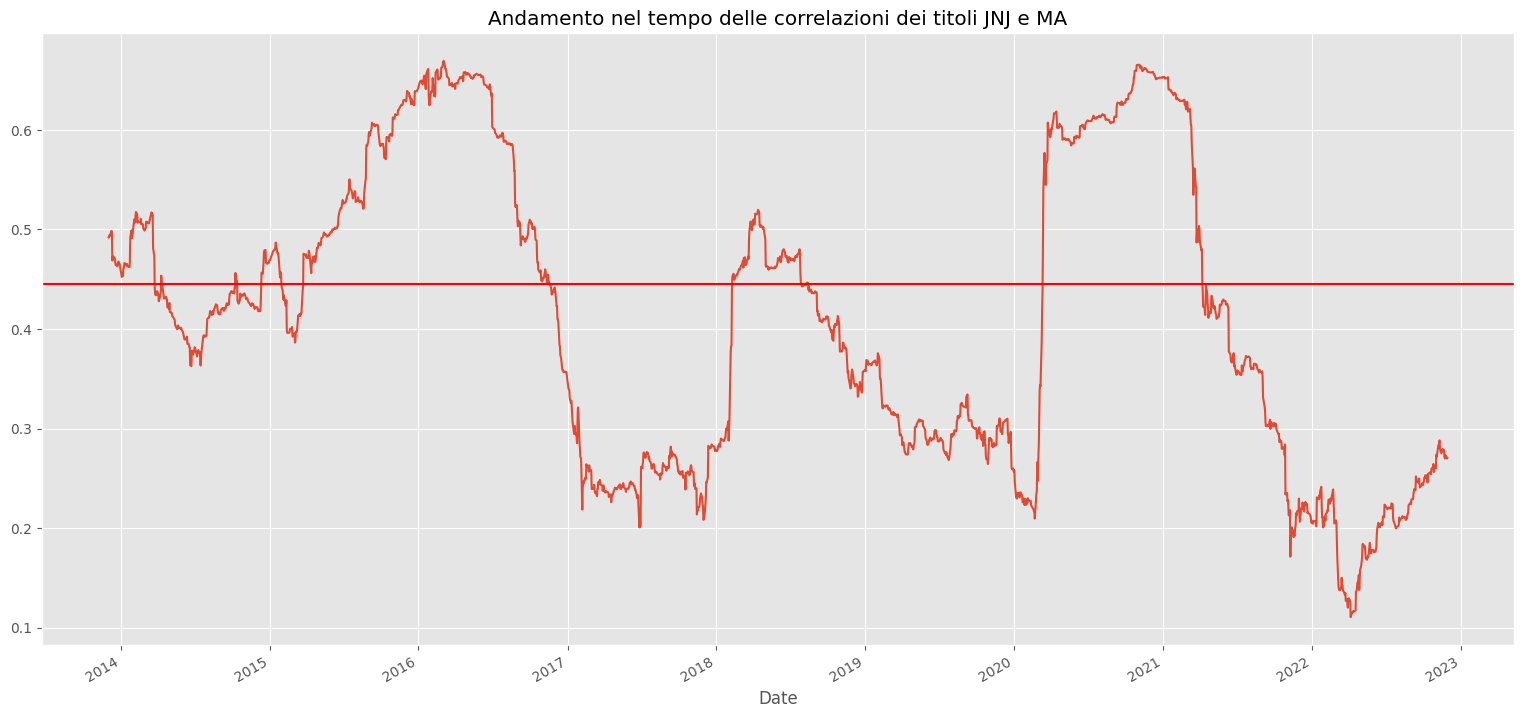

In [44]:
ax = df4_log_return['JNJ'].rolling(252).corr(df4_log_return['MA']).plot(figsize=(19,9))
ax.axhline(cor.iloc[2, 4], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli JNJ e MA')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli JNJ e JPM')

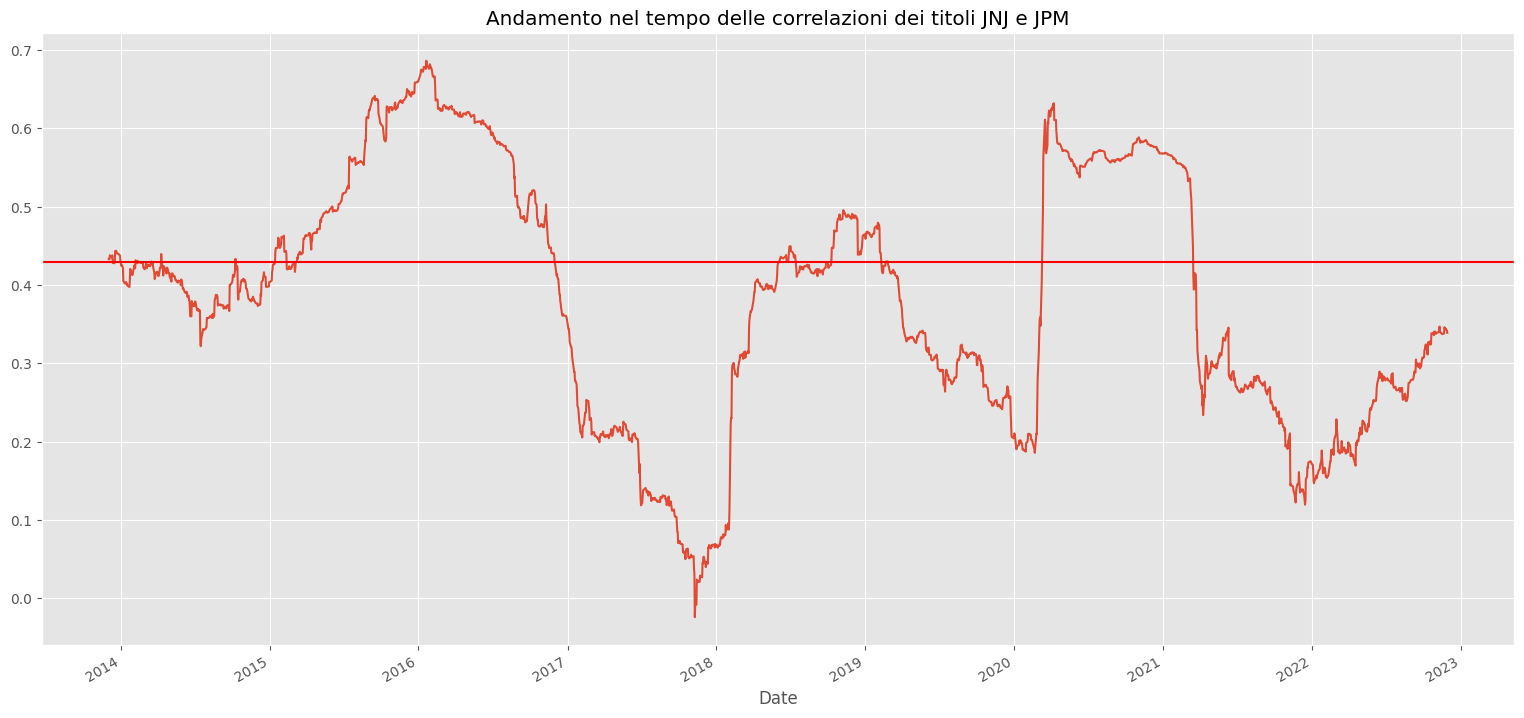

In [45]:
ax = df4_log_return['JNJ'].rolling(252).corr(df4_log_return['JPM']).plot(figsize=(19,9))
ax.axhline(cor.iloc[2, 5], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli JNJ e JPM')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli MA e PFE')

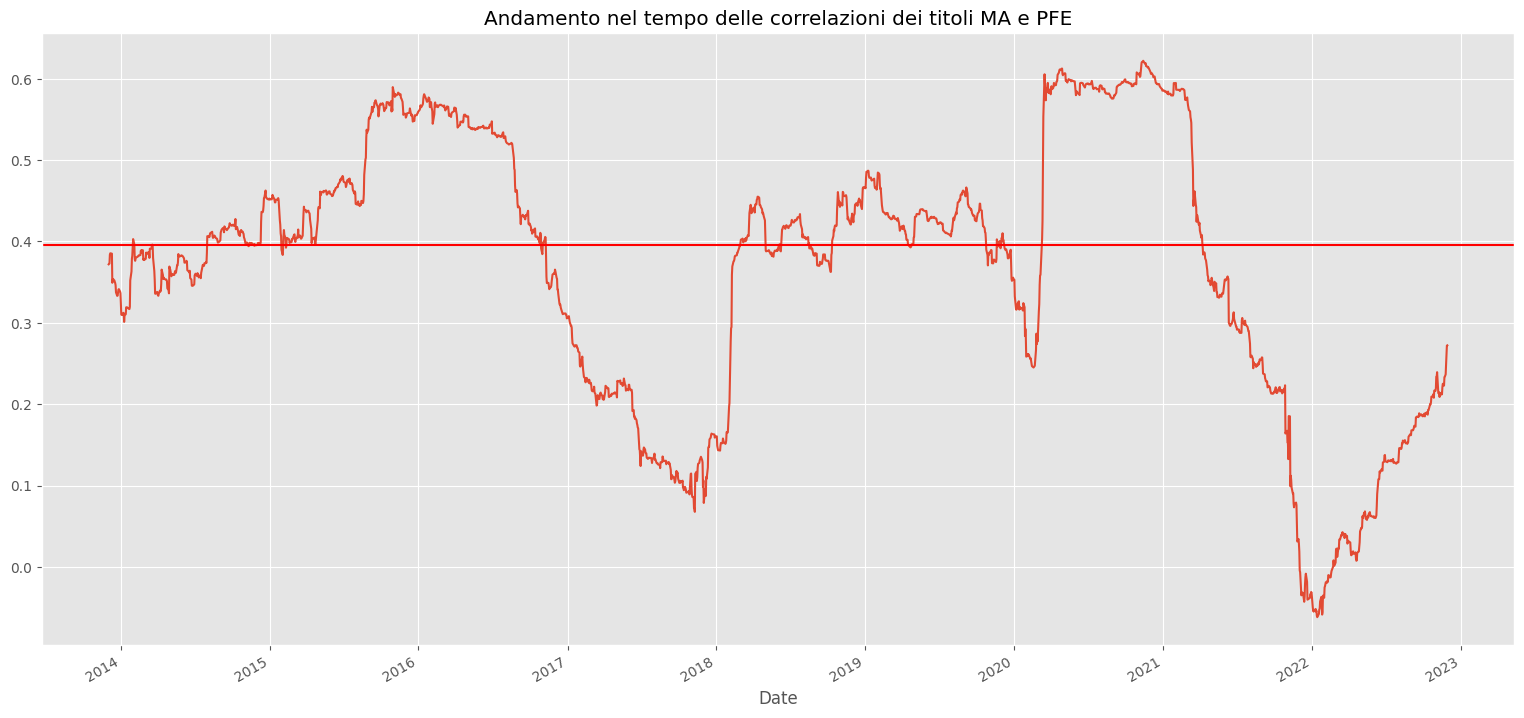

In [46]:
ax = df4_log_return['PFE'].rolling(252).corr(df4_log_return['MA']).plot(figsize=(19,9))
ax.axhline(cor.iloc[3, 4], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli MA e PFE')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli JNJ e PFE')

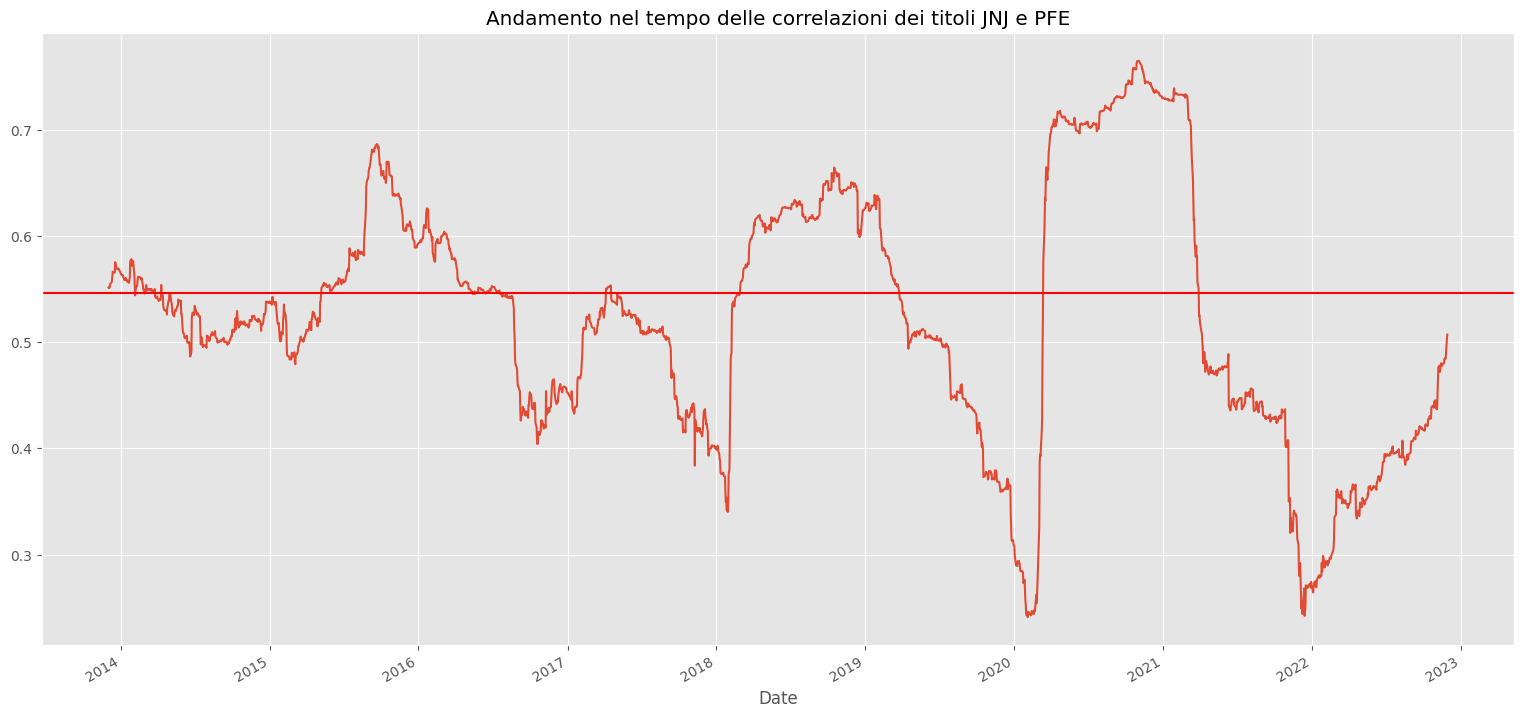

In [47]:
ax = df4_log_return['JNJ'].rolling(252).corr(df4_log_return['PFE']).plot(figsize=(19,9))
ax.axhline(cor.iloc[2, 3], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli JNJ e PFE')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli JPM e PFE')

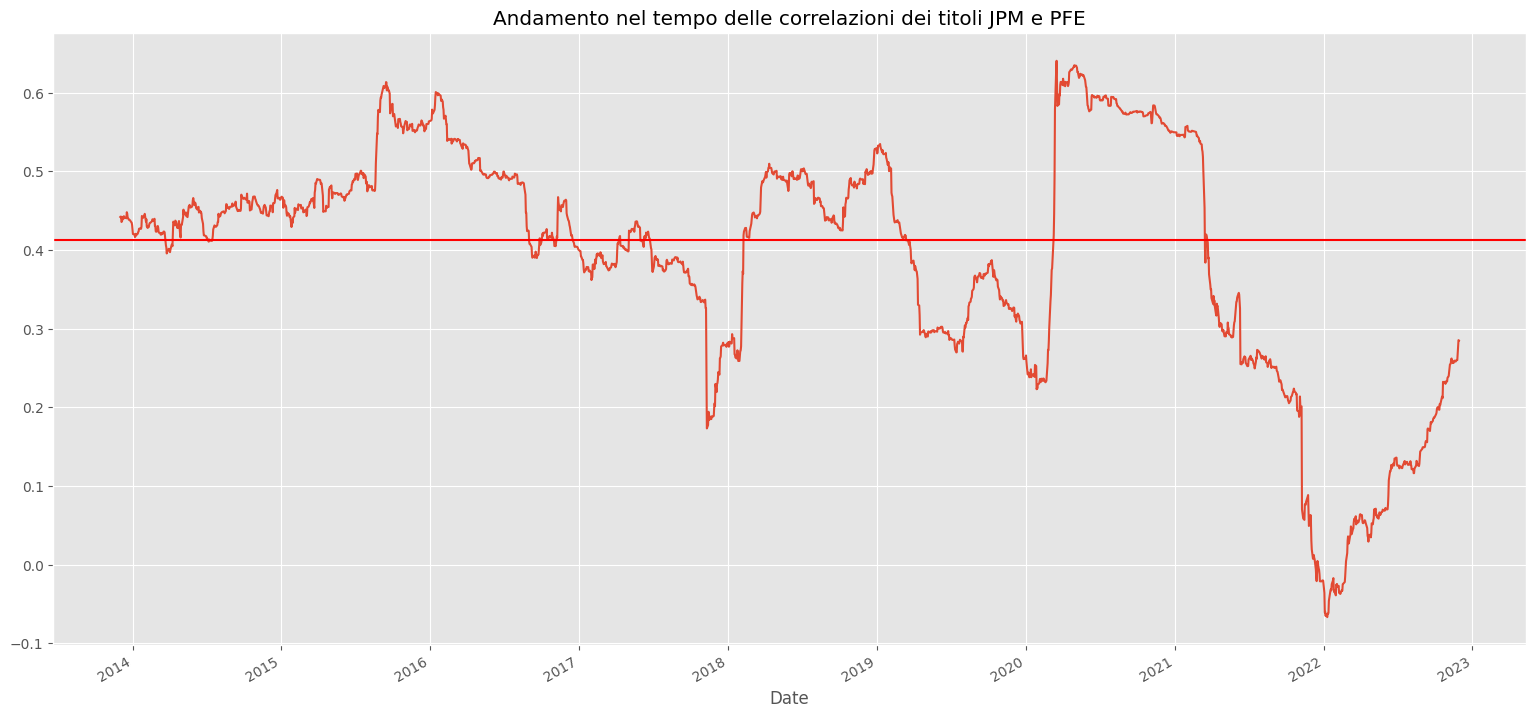

In [48]:
ax = df4_log_return['PFE'].rolling(252).corr(df4_log_return['JPM']).plot(figsize=(19,9))
ax.axhline(cor.iloc[3, 5], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli JPM e PFE')

Text(0.5, 1.0, 'Andamento nel tempo delle correlazioni dei titoli MA e JPM')

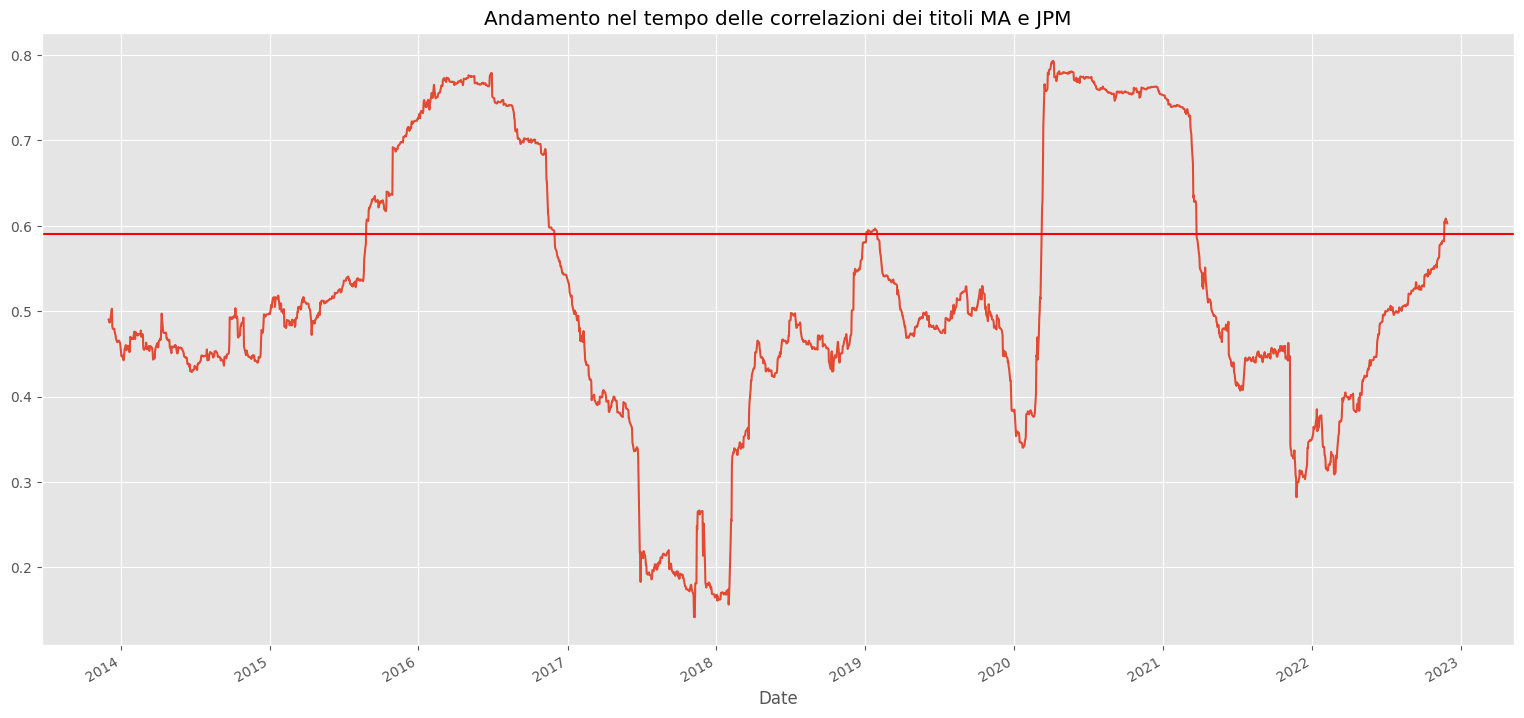

In [49]:
ax = df4_log_return['MA'].rolling(252).corr(df4_log_return['JPM']).plot(figsize=(19,9))
ax.axhline(cor.iloc[4, 5], c='r')
plt.title('Andamento nel tempo delle correlazioni dei titoli MA e JPM')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di TXN e MSFT')

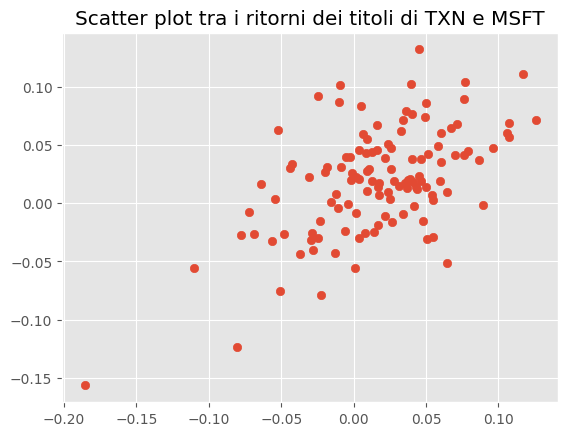

In [50]:
#mostro i grafici di dispersione di ogni coppia di ritorni logaritmici
plt.scatter(TXN_log_return, MSFT_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di TXN e MSFT')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di TXN e JNJ')

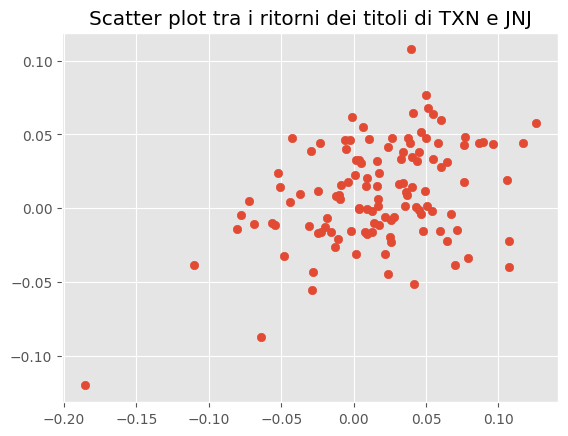

In [51]:
plt.scatter(TXN_log_return, JNJ_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di TXN e JNJ')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di TXN e PFE')

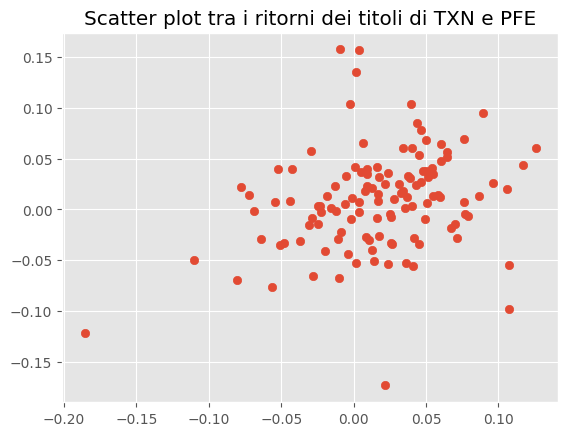

In [52]:
plt.scatter(TXN_log_return, PFE_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di TXN e PFE')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di TXN e MA')

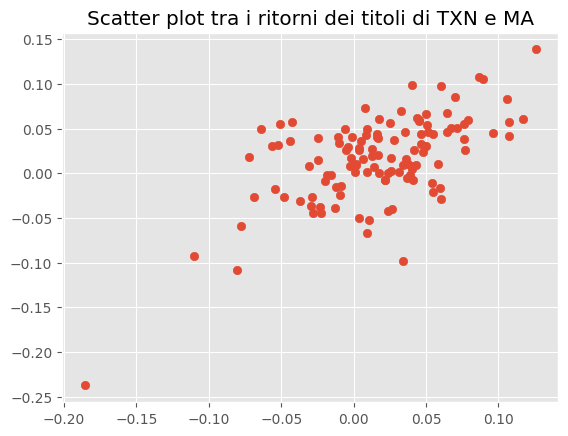

In [53]:
plt.scatter(TXN_log_return, MA_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di TXN e MA')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di TXN e JPM')

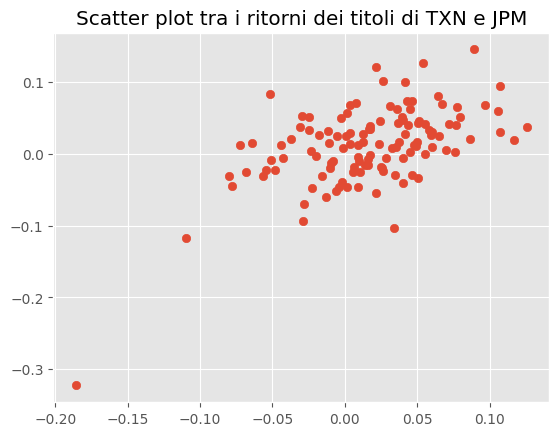

In [54]:
plt.scatter(TXN_log_return, JPM_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di TXN e JPM')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di JNJ e MSFT')

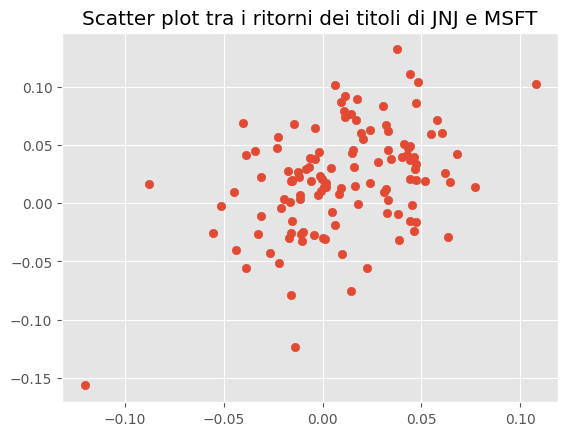

In [55]:
plt.scatter(JNJ_log_return, MSFT_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di JNJ e MSFT')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di PFE e MSFT')

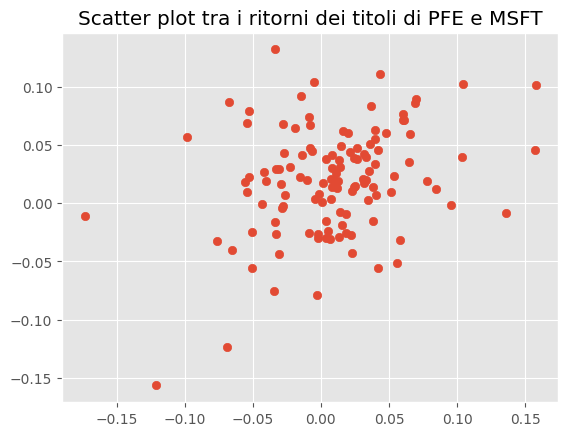

In [56]:
plt.scatter(PFE_log_return, MSFT_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di PFE e MSFT')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di MA e MSFT')

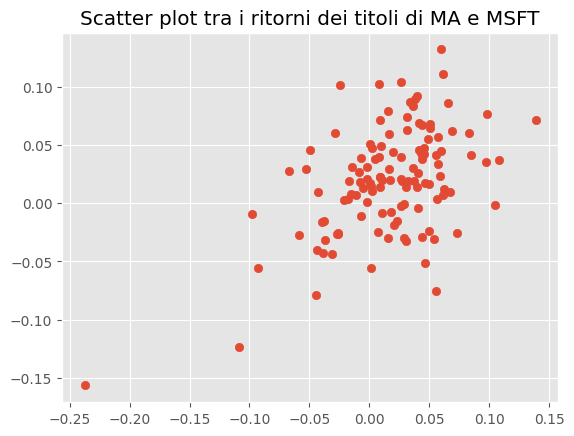

In [57]:
plt.scatter(MA_log_return, MSFT_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di MA e MSFT')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di JPM e MSFT')

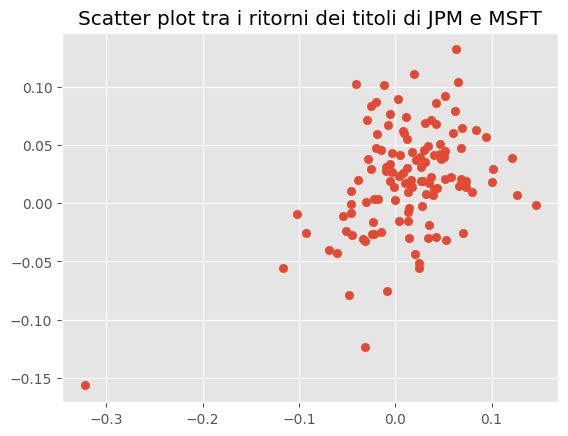

In [58]:
plt.scatter(JPM_log_return, MSFT_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di JPM e MSFT')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di JNJ e PFE')

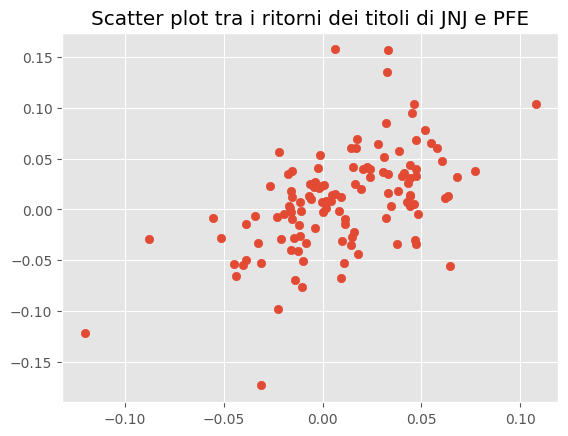

In [59]:
plt.scatter(JNJ_log_return, PFE_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di JNJ e PFE')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di JNJ e MA')

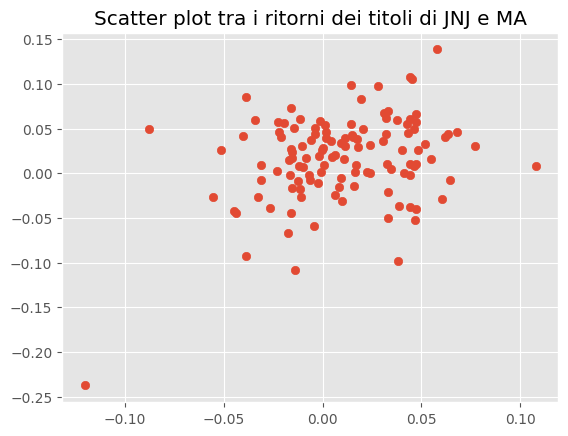

In [60]:
plt.scatter(JNJ_log_return, MA_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di JNJ e MA')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di JNJ e JPM')

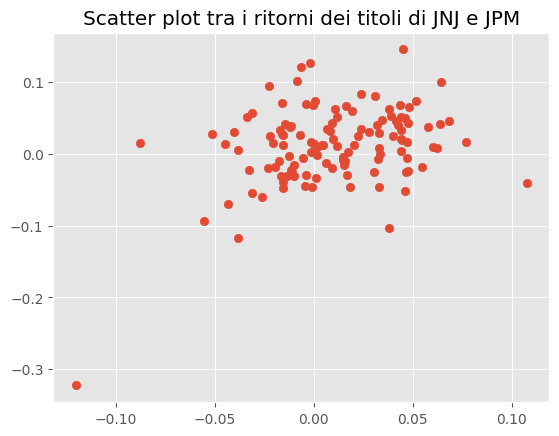

In [61]:
plt.scatter(JNJ_log_return, JPM_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di JNJ e JPM')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di PFE e MA')

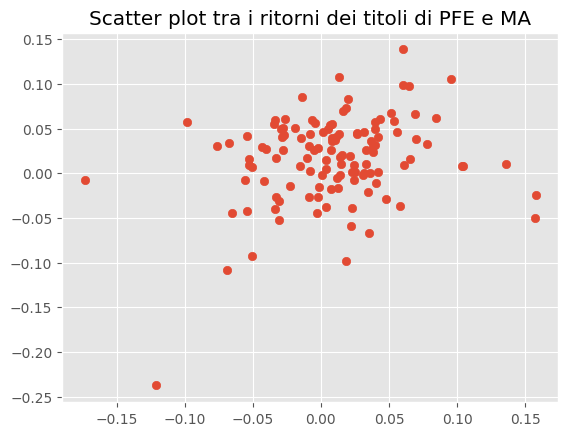

In [62]:
plt.scatter(PFE_log_return, MA_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di PFE e MA')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di PFE e JPM')

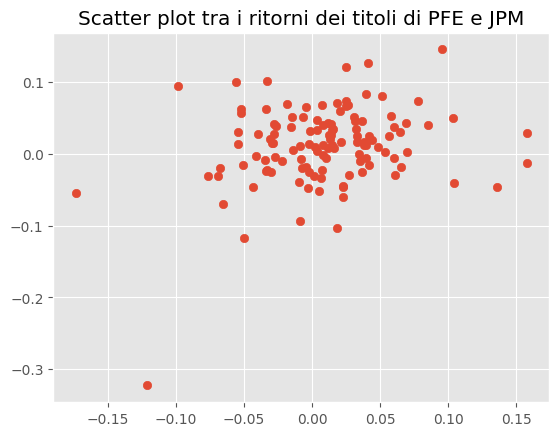

In [63]:
plt.scatter(PFE_log_return, JPM_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di PFE e JPM')

Text(0.5, 1.0, 'Scatter plot tra i ritorni dei titoli di MA e JPM')

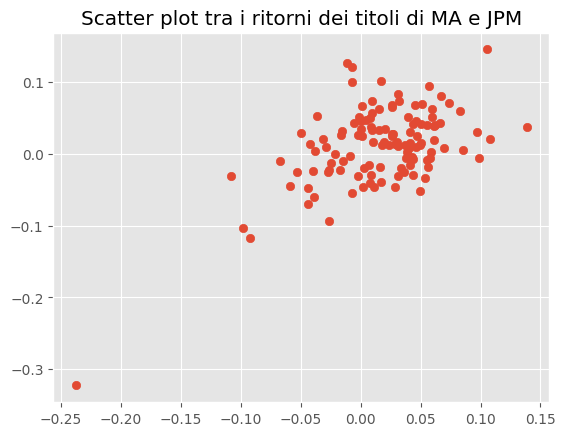

In [64]:
plt.scatter(MA_log_return, JPM_log_return)
plt.title('Scatter plot tra i ritorni dei titoli di MA e JPM')

FORECASTING

In [65]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

ARIMA TXN

In [66]:
training_data = list(TXN_month[0:80]['Adj Close'])    #primi 80 mesi della serie li uso per il training
validation_data = list(TXN_month[80:90]['Adj Close']) #i successivi 10 mesi li uso come validation
testing_data = TXN_month[90:120]['Adj Close']         #gli ultimi 30 mesi li utilizzo per fare il testing

In [67]:
def evaluate_arima_model(arima_order):                      #creo il modello e calcolo il mean squared error per scegliere 
    modelARIMA = ARIMA(training_data,order=arima_order)     #i parametri che mi permettono di minimizzarlo il più possibile
    model_fit = modelARIMA.fit()
    predicted = model_fit.predict(start = 81 ,end = 90)
    error = mean_squared_error(validation_data, predicted)
    return error
 
#valuto tutte le possibili combinazioni con un valore dei parametri compreso tra 0 e 2 e le confronto
def evaluate_models():
    p_values = [0, 1, 2]
    d_values = [0, 1, 2]
    q_values = [0, 1, 2]
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:                        #confronto con il MSE migliore trovato 
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
# evaluate parameters
warnings.filterwarnings("ignore")
evaluate_models()   

ARIMA(0, 0, 0) MSE=2955.9479100
ARIMA(0, 0, 1) MSE=2948.4855702
ARIMA(0, 0, 2) MSE=2775.5307621
ARIMA(0, 1, 0) MSE=152.0884097
ARIMA(0, 1, 1) MSE=147.2762361
ARIMA(0, 1, 2) MSE=177.4609600
ARIMA(0, 2, 0) MSE=89.5158916
ARIMA(0, 2, 1) MSE=81.9009922
ARIMA(0, 2, 2) MSE=81.4787164
ARIMA(1, 0, 0) MSE=170.2664249
ARIMA(1, 0, 1) MSE=169.1251312
ARIMA(1, 0, 2) MSE=229.1788718
ARIMA(1, 1, 0) MSE=145.7804293
ARIMA(1, 1, 1) MSE=143.3361995
ARIMA(1, 1, 2) MSE=186.7371193
ARIMA(1, 2, 0) MSE=255.9153061
ARIMA(1, 2, 1) MSE=81.4939519
ARIMA(1, 2, 2) MSE=82.8993561
ARIMA(2, 0, 0) MSE=173.2404529
ARIMA(2, 0, 1) MSE=173.4193299
ARIMA(2, 0, 2) MSE=234.3063718
ARIMA(2, 1, 0) MSE=166.8178592
ARIMA(2, 1, 1) MSE=174.1910958
ARIMA(2, 1, 2) MSE=161.8694119
ARIMA(2, 2, 0) MSE=207.3481478
ARIMA(2, 2, 1) MSE=91.1045573
ARIMA(2, 2, 2) MSE=93.5149639
Best ARIMA(0, 2, 2) MSE=81.4787164


In [68]:
model = ARIMA(training_data, order = (0,2,2))
model_fit = model.fit()                         #fitting del modello
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -197.498
Date:                Thu, 19 Jan 2023   AIC                            400.997
Time:                        17:27:53   BIC                            408.067
Sample:                             0   HQIC                           403.827
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9412      1.380     -0.682      0.495      -3.646       1.764
ma.L2         -0.0582      0.144     -0.403      0.687      -0.341       0.225
sigma2         8.7764     12.402      0.708      0.479     -15.532      33.084
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.63
Prob(Q):                              0.98   Prob(JB):                         0.10
Heteroskedasticity (H):              11.10   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
prediction = model_fit.get_prediction(start=91, end=120)  #faccio la previsione dal 90° mese al 120°
prediction_ci = prediction.conf_int()
prediction_df=pd.DataFrame(prediction_ci, columns = ['Lower Price','Upper Price'], index=TXN_month[90:120].index) #creo il DF

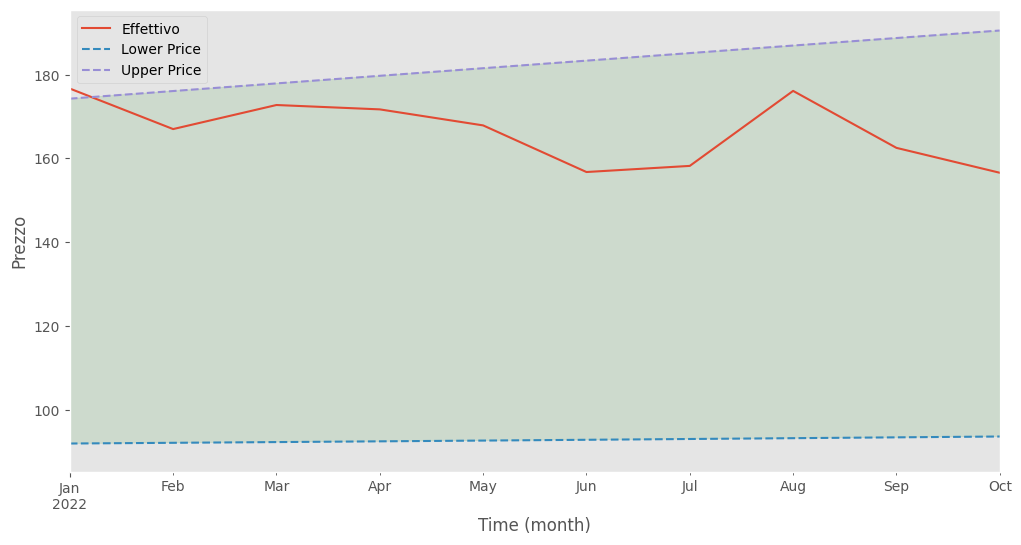

In [70]:
#confronto i valori ottenuti degli ultimi 10 mesi con quelli effetttivi
plt.figure(figsize=(12,6))
ax = testing_data[20:30].plot(label = 'Effettivo')
prediction_df[20:30].plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_df.index
lower_ci = prediction_df.iloc[:,0]
upper_ci = prediction_df.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

ARIMA MICROSOFT 

In [71]:
training_data = list(MSFT_month[0:80]['Adj Close'])   
validation_data = list(MSFT_month[80:90]['Adj Close']) 
testing_data = MSFT_month[90:120]['Adj Close']

In [72]:
evaluate_models() 

ARIMA(0, 0, 0) MSE=8407.5472477
ARIMA(0, 0, 1) MSE=8368.6694052
ARIMA(0, 0, 2) MSE=8029.0427764
ARIMA(0, 1, 0) MSE=594.3351246
ARIMA(0, 1, 1) MSE=506.2410898
ARIMA(0, 1, 2) MSE=439.2016796
ARIMA(0, 2, 0) MSE=356.0741520
ARIMA(0, 2, 1) MSE=64.3492571
ARIMA(0, 2, 2) MSE=72.0832329
ARIMA(1, 0, 0) MSE=616.4724487
ARIMA(1, 0, 1) MSE=537.3330848
ARIMA(1, 0, 2) MSE=483.8396746
ARIMA(1, 1, 0) MSE=320.3847017
ARIMA(1, 1, 1) MSE=328.8533344
ARIMA(1, 1, 2) MSE=88.3990414
ARIMA(1, 2, 0) MSE=284.4282652
ARIMA(1, 2, 1) MSE=77.6231836
ARIMA(1, 2, 2) MSE=76.4365869
ARIMA(2, 0, 0) MSE=378.0530138
ARIMA(2, 0, 1) MSE=385.6004550
ARIMA(2, 0, 2) MSE=456.2147043
ARIMA(2, 1, 0) MSE=329.4239178
ARIMA(2, 1, 1) MSE=329.4119099
ARIMA(2, 1, 2) MSE=97.1736948
ARIMA(2, 2, 0) MSE=346.8931580
ARIMA(2, 2, 1) MSE=75.2534856
ARIMA(2, 2, 2) MSE=77.6886557
Best ARIMA(0, 2, 1) MSE=64.3492571


In [73]:
model = ARIMA(training_data, order = (0,2,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -170.676
Date:                Thu, 19 Jan 2023   AIC                            345.352
Time:                        17:27:56   BIC                            350.066
Sample:                             0   HQIC                           347.239
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8897      0.061    -14.477      0.000      -1.010      -0.769
sigma2         4.5646      0.696      6.557      0.000       3.200       5.929
===================================================================================
Ljung-Box (L1) (Q):                   9.75   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.00   Prob(JB):                         0.69
Heteroskedasticity (H):               3.78   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
prediction = model_fit.get_prediction(start=91, end=120)
prediction_ci = prediction.conf_int()
prediction_df=pd.DataFrame(prediction_ci, columns = ['Lower Price','Upper Price'], index=MSFT_month[90:120].index)

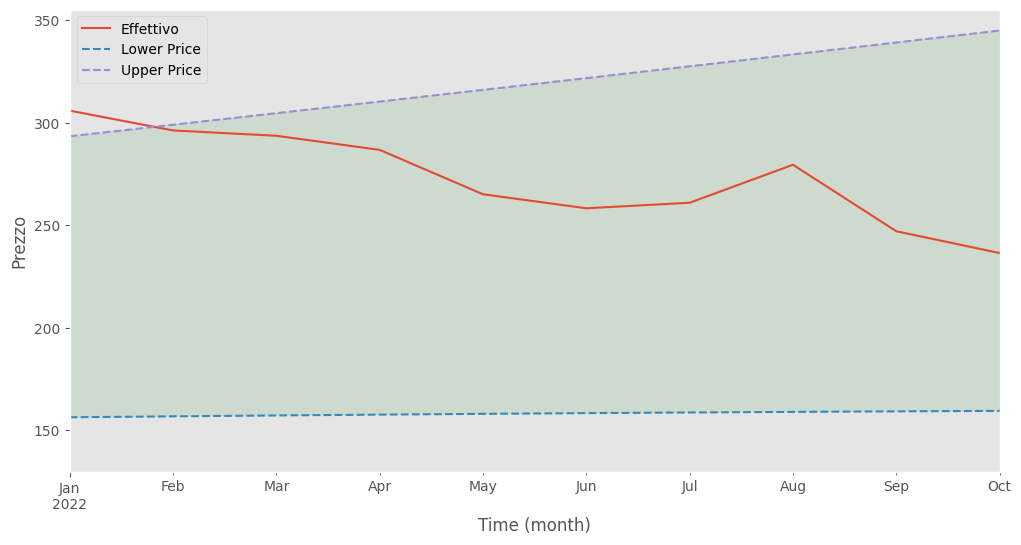

In [75]:
#confronto i valori ottenuti degli ultimi 10 mesi
plt.figure(figsize=(12,6))
ax = testing_data[20:30].plot(label = 'Effettivo')
prediction_df[20:30].plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_df.index
lower_ci = prediction_df.iloc[:,0]
upper_ci = prediction_df.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

ARIMA JNJ

In [76]:
training_data = list(JNJ_month[0:80]['Adj Close'])    
validation_data = list(JNJ_month[80:90]['Adj Close']) 
testing_data = JNJ_month[90:120]['Adj Close']

In [77]:
evaluate_models()

ARIMA(0, 0, 0) MSE=1153.9587831
ARIMA(0, 0, 1) MSE=1156.8478105
ARIMA(0, 0, 2) MSE=1107.5739500
ARIMA(0, 1, 0) MSE=52.4259068
ARIMA(0, 1, 1) MSE=52.7143434
ARIMA(0, 1, 2) MSE=52.5523623
ARIMA(0, 2, 0) MSE=194.1540252
ARIMA(0, 2, 1) MSE=74.7395194
ARIMA(0, 2, 2) MSE=76.0602826
ARIMA(1, 0, 0) MSE=58.0308465
ARIMA(1, 0, 1) MSE=60.2654584
ARIMA(1, 0, 2) MSE=58.8262898
ARIMA(1, 1, 0) MSE=52.7405636
ARIMA(1, 1, 1) MSE=52.5115456
ARIMA(1, 1, 2) MSE=52.5254311
ARIMA(1, 2, 0) MSE=130.4729274
ARIMA(1, 2, 1) MSE=75.8459978
ARIMA(1, 2, 2) MSE=74.9798666
ARIMA(2, 0, 0) MSE=60.3690616
ARIMA(2, 0, 1) MSE=58.6835408
ARIMA(2, 0, 2) MSE=59.5458924
ARIMA(2, 1, 0) MSE=52.6367999
ARIMA(2, 1, 1) MSE=52.5315469
ARIMA(2, 1, 2) MSE=65.1711993
ARIMA(2, 2, 0) MSE=76.2494596
ARIMA(2, 2, 1) MSE=75.0567818
ARIMA(2, 2, 2) MSE=74.3611945
Best ARIMA(0, 1, 0) MSE=52.4259068


In [78]:
model = ARIMA(training_data, order = (0,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -206.203
Date:                Thu, 19 Jan 2023   AIC                            414.406
Time:                        17:28:00   BIC                            416.776
Sample:                             0   HQIC                           415.355
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.8317      1.535      7.056      0.000       7.823      13.841
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                10.00
Prob(Q):                              0.56   Prob(JB):                         0.01
Heteroskedasticity (H):               3.00   Skew:                            -0.57
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
prediction = model_fit.get_prediction(start=91, end=120)
prediction_ci = prediction.conf_int()
prediction_df=pd.DataFrame(prediction_ci, columns = ['Lower Price','Upper Price'], index=JNJ_month[90:120].index)

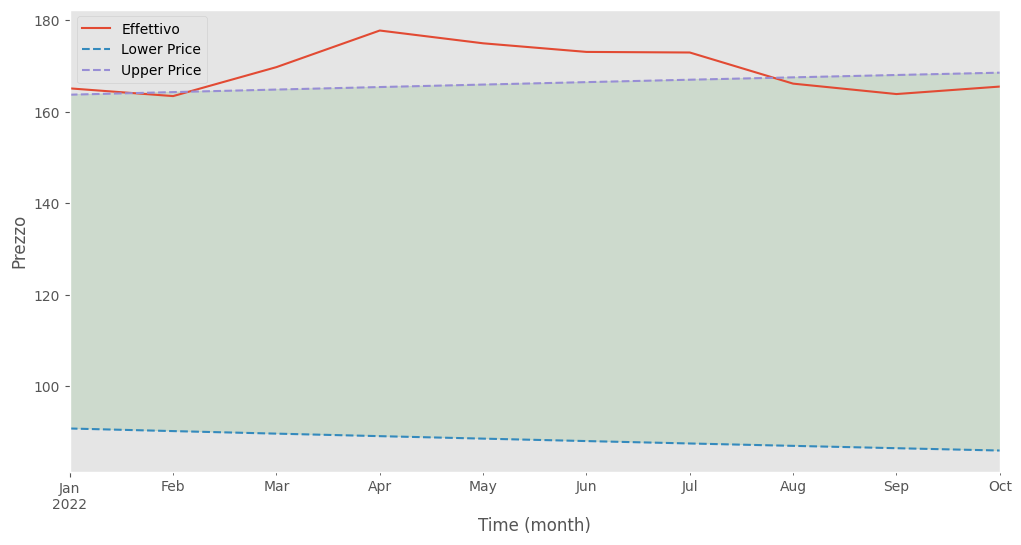

In [80]:
#confronto i valori ottenuti degli ultimi 10 mesi
plt.figure(figsize=(12,6))
ax = testing_data[20:30].plot(label = 'Effettivo')
prediction_df[20:30].plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_df.index
lower_ci = prediction_df.iloc[:,0]
upper_ci = prediction_df.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

ARIMA PFIZER

In [81]:
training_data = list(PFE_month[0:80]['Adj Close'])    
validation_data = list(PFE_month[80:90]['Adj Close']) 
testing_data = PFE_month[90:120]['Adj Close']

In [82]:
evaluate_models()

ARIMA(0, 0, 0) MSE=43.8567913
ARIMA(0, 0, 1) MSE=43.4808143
ARIMA(0, 0, 2) MSE=38.1662233
ARIMA(0, 1, 0) MSE=23.4177428
ARIMA(0, 1, 1) MSE=27.0778061
ARIMA(0, 1, 2) MSE=28.4543756
ARIMA(0, 2, 0) MSE=224.3263602
ARIMA(0, 2, 1) MSE=41.4912337
ARIMA(0, 2, 2) MSE=45.6164400
ARIMA(1, 0, 0) MSE=20.5455068
ARIMA(1, 0, 1) MSE=22.1890406
ARIMA(1, 0, 2) MSE=22.8382112
ARIMA(1, 1, 0) MSE=29.7558611
ARIMA(1, 1, 1) MSE=29.9312571
ARIMA(1, 1, 2) MSE=41.1638745
ARIMA(1, 2, 0) MSE=162.5322021
ARIMA(1, 2, 1) MSE=47.6532096
ARIMA(1, 2, 2) MSE=47.1067403
ARIMA(2, 0, 0) MSE=23.2831926
ARIMA(2, 0, 1) MSE=23.4206659
ARIMA(2, 0, 2) MSE=23.3913295
ARIMA(2, 1, 0) MSE=29.9286622
ARIMA(2, 1, 1) MSE=29.9333540
ARIMA(2, 1, 2) MSE=42.0754790
ARIMA(2, 2, 0) MSE=108.8520015
ARIMA(2, 2, 1) MSE=47.0876136
ARIMA(2, 2, 2) MSE=47.8455544
Best ARIMA(1, 0, 0) MSE=20.5455068


In [83]:
model = ARIMA(training_data, order = (1,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -103.173
Date:                Thu, 19 Jan 2023   AIC                            212.346
Time:                        17:28:05   BIC                            219.492
Sample:                             0   HQIC                           215.211
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0229      8.207      3.171      0.002       9.937      42.109
ar.L1          0.9950      0.022     45.226      0.000       0.952       1.038
sigma2         0.7290      0.098      7.459      0.000       0.537       0.920
===================================================================================
Ljung-Box (L1) (Q):                   5.14   Jarque-Bera (JB):                 7.69
Prob(Q):                              0.02   Prob(JB):                         0.02
Heteroskedasticity (H):               1.80   Skew:                             0.52
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
prediction = model_fit.get_prediction(start=91, end=120)
prediction_ci = prediction.conf_int()
prediction_df=pd.DataFrame(prediction_ci, columns = ['Lower Price','Upper Price'], index=PFE_month[90:120].index)

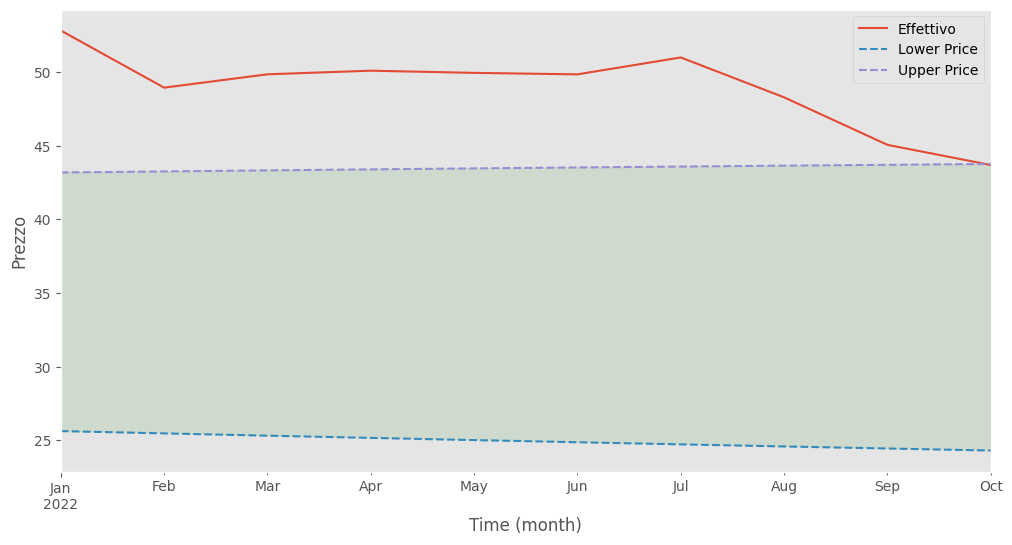

In [85]:
#confronto i valori ottenuti degli ultimi 10 mesi
plt.figure(figsize=(12,6))
ax = testing_data[20:30].plot(label = 'Effettivo')
prediction_df[20:30].plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_df.index
lower_ci = prediction_df.iloc[:,0]
upper_ci = prediction_df.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

ARIMA MASTERCARD

In [86]:
training_data = list(MA_month[0:80]['Adj Close'])   
validation_data = list(MA_month[80:90]['Adj Close']) 
testing_data = MA_month[90:120]['Adj Close']

In [87]:
evaluate_models()

ARIMA(0, 0, 0) MSE=28124.4266086
ARIMA(0, 0, 1) MSE=27959.8136573
ARIMA(0, 0, 2) MSE=26379.8929586
ARIMA(0, 1, 0) MSE=955.7315617
ARIMA(0, 1, 1) MSE=838.8574812
ARIMA(0, 1, 2) MSE=729.0459715
ARIMA(0, 2, 0) MSE=3114.8286137
ARIMA(0, 2, 1) MSE=1084.7090368
ARIMA(0, 2, 2) MSE=915.7169340
ARIMA(1, 0, 0) MSE=1011.9574987
ARIMA(1, 0, 1) MSE=914.4866285
ARIMA(1, 0, 2) MSE=831.6058113
ARIMA(1, 1, 0) MSE=650.5478564
ARIMA(1, 1, 1) MSE=846.5128290
ARIMA(1, 1, 2) MSE=715.1024548
ARIMA(1, 2, 0) MSE=2826.9984097
ARIMA(1, 2, 1) MSE=871.4220992
ARIMA(1, 2, 2) MSE=872.9493201
ARIMA(2, 0, 0) MSE=750.7669026
ARIMA(2, 0, 1) MSE=659.7932756
ARIMA(2, 0, 2) MSE=880.2188009
ARIMA(2, 1, 0) MSE=530.1628740
ARIMA(2, 1, 1) MSE=529.8352560
ARIMA(2, 1, 2) MSE=674.4885214
ARIMA(2, 2, 0) MSE=2951.7519057
ARIMA(2, 2, 1) MSE=875.1265796
ARIMA(2, 2, 2) MSE=839.5418210
Best ARIMA(2, 1, 1) MSE=529.8352560


In [88]:
model = ARIMA(training_data, order = (2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -241.927
Date:                Thu, 19 Jan 2023   AIC                            491.854
Time:                        17:28:08   BIC                            501.331
Sample:                             0   HQIC                           495.651
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3932      1.088      0.361      0.718      -1.740       2.526
ar.L2          0.1332      0.573      0.232      0.816      -0.990       1.256
ma.L1         -0.0021      1.091     -0.002      0.998      -2.141       2.137
sigma2        26.6691      2.591     10.294      0.000      21.591      31.747
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                58.67
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               5.34   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
prediction = model_fit.get_prediction(start=91, end=120)
prediction_ci = prediction.conf_int()
prediction_df=pd.DataFrame(prediction_ci, columns = ['Lower Price','Upper Price'], index=MA_month[90:120].index)

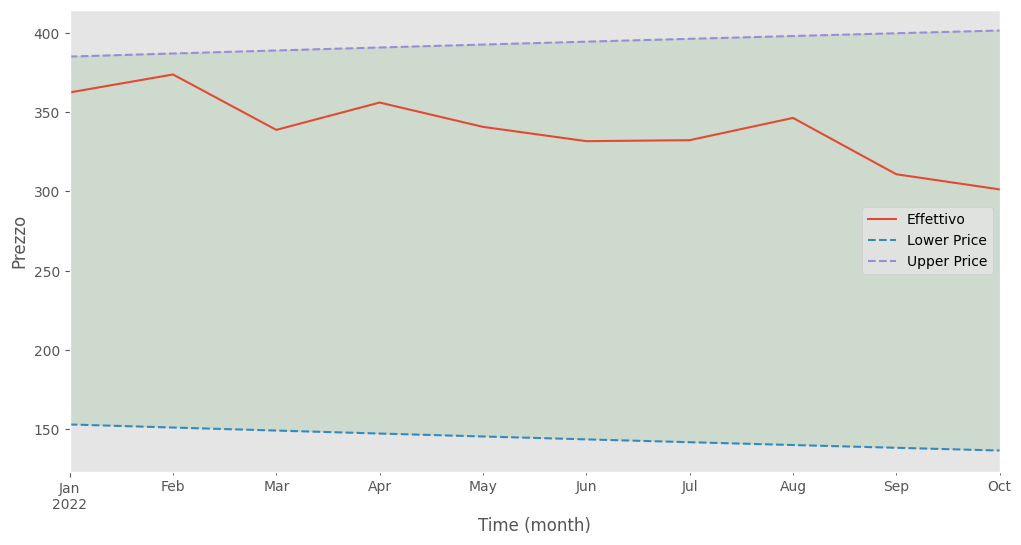

In [90]:
#confronto i valori ottenuti degli ultimi 10 mesi
plt.figure(figsize=(12,6))
ax = testing_data[20:30].plot(label = 'Effettivo')
prediction_df[20:30].plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_df.index
lower_ci = prediction_df.iloc[:,0]
upper_ci = prediction_df.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

ARIMA JP MORGAN

In [91]:
training_data = list(JPM_month[0:80]['Adj Close'])    #primi 80 mesi della serie li uso per il training
validation_data = list(JPM_month[80:90]['Adj Close']) #i successivi 10 mesi li uso come validation
testing_data = JPM_month[90:120]['Adj Close']

In [92]:
evaluate_models()

ARIMA(0, 0, 0) MSE=2171.3926362
ARIMA(0, 0, 1) MSE=2171.0192594
ARIMA(0, 0, 2) MSE=2064.2568311
ARIMA(0, 1, 0) MSE=278.7916743
ARIMA(0, 1, 1) MSE=285.8265166
ARIMA(0, 1, 2) MSE=280.4715058
ARIMA(0, 2, 0) MSE=564.9443602
ARIMA(0, 2, 1) MSE=216.6211433
ARIMA(0, 2, 2) MSE=220.8555768
ARIMA(1, 0, 0) MSE=295.1062294
ARIMA(1, 0, 1) MSE=314.2371682
ARIMA(1, 0, 2) MSE=305.5044222
ARIMA(1, 1, 0) MSE=288.1379926
ARIMA(1, 1, 1) MSE=280.3719008
ARIMA(1, 1, 2) MSE=284.0731294
ARIMA(1, 2, 0) MSE=393.1625804
ARIMA(1, 2, 1) MSE=221.2256859
ARIMA(1, 2, 2) MSE=218.2077822
ARIMA(2, 0, 0) MSE=318.8909175
ARIMA(2, 0, 1) MSE=302.9085700
ARIMA(2, 0, 2) MSE=309.3707955
ARIMA(2, 1, 0) MSE=288.0204399
ARIMA(2, 1, 1) MSE=286.3912453
ARIMA(2, 1, 2) MSE=223.3155301
ARIMA(2, 2, 0) MSE=208.6929396
ARIMA(2, 2, 1) MSE=219.7600322
ARIMA(2, 2, 2) MSE=218.3408419
Best ARIMA(2, 2, 0) MSE=208.6929396


In [93]:
model = ARIMA(training_data, order = (2,2,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -195.193
Date:                Thu, 19 Jan 2023   AIC                            396.385
Time:                        17:28:12   BIC                            403.455
Sample:                             0   HQIC                           399.215
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5119      0.097     -5.254      0.000      -0.703      -0.321
ar.L2         -0.3793      0.125     -3.029      0.002      -0.625      -0.134
sigma2         8.6813      1.429      6.074      0.000       5.880      11.483
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.91   Prob(JB):                         0.89
Heteroskedasticity (H):               5.31   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
prediction = model_fit.get_prediction(start=91, end=120)
prediction_ci = prediction.conf_int()
prediction_df=pd.DataFrame(prediction_ci, columns = ['Lower Price','Upper Price'], index=JPM_month[90:120].index)

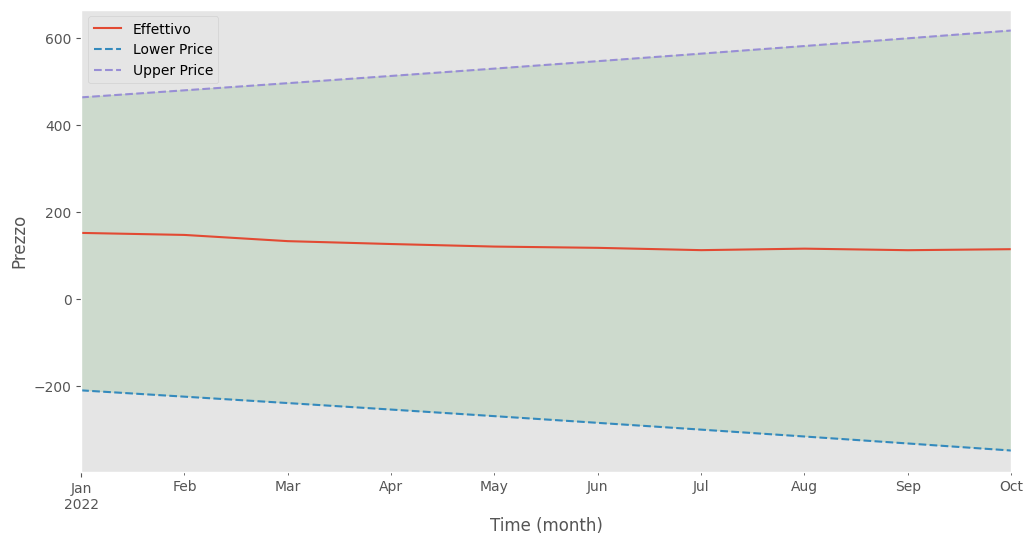

In [95]:
#confronto i valori ottenuti degli ultimi 10 mesi
plt.figure(figsize=(12,6))
ax = testing_data[20:30].plot(label = 'Effettivo')
prediction_df[20:30].plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_df.index
lower_ci = prediction_df.iloc[:,0]
upper_ci = prediction_df.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (month)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

STRATEGIE DI TRADING

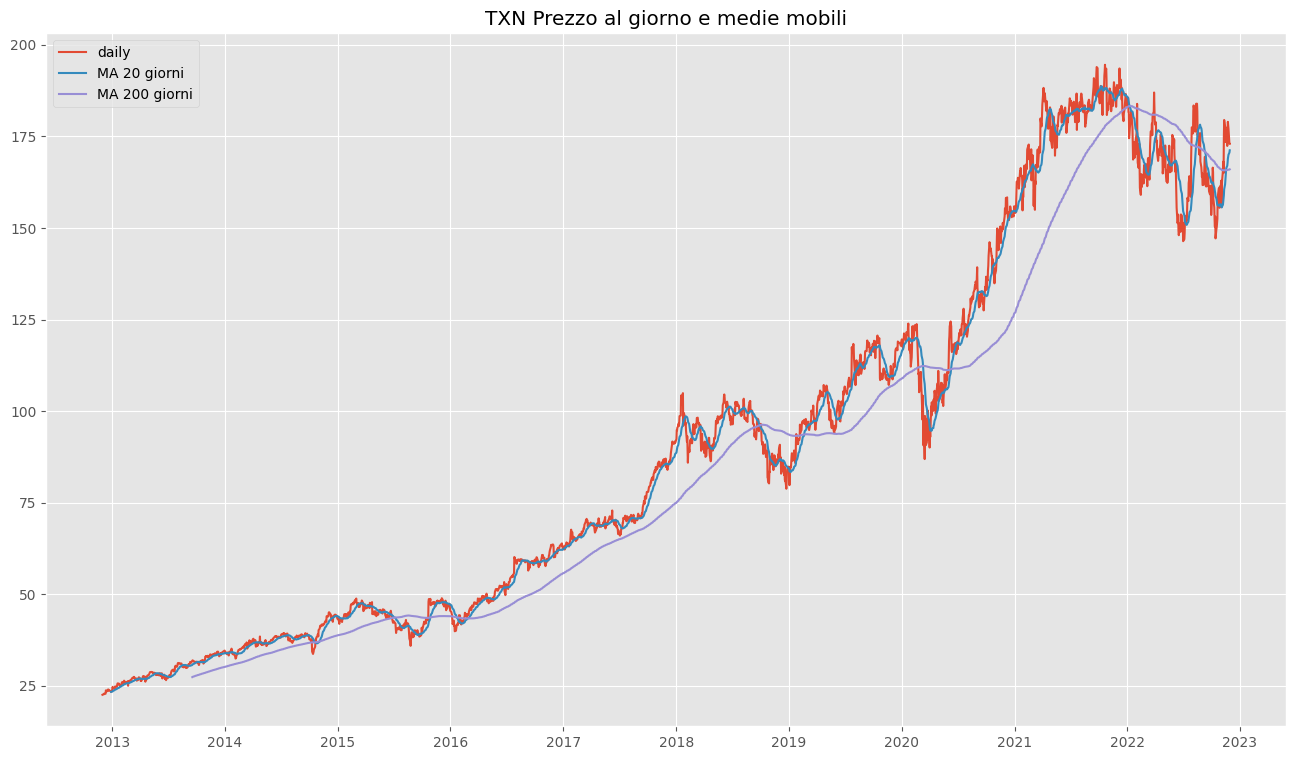

In [96]:
#creo la serie della media mobile a 20 e 200 periodi
TXN['MA20'] = TXN['Adj Close'].rolling(20).mean()
TXN['MA200'] = TXN['Adj Close'].rolling(200).mean()

plt.figure(figsize=(16,9))
plt.plot(TXN['Adj Close'], label = 'daily')
plt.plot(TXN['MA20'], label = 'MA 20 giorni')
plt.plot(TXN['MA200'], label = 'MA 200 giorni')
plt.legend(loc = 'best')
plt.title('TXN Prezzo al giorno e medie mobili')
plt.show()

In [97]:
TXN['Price_yesterday'] = TXN['Adj Close'].shift(1)
TXN['Change'] = TXN['Adj Close'] / TXN['Price_yesterday']

#creo una colonna che chiamo 'Invested_SMA' nella quale inserisco il valore 1 quando la media a 20 giorni supera quella a 200,
#viceversa il valore 0
TXN['Invested_SMA'] = [1 if TXN.loc[i, 'MA20'] > TXN.loc[i, 'MA200'] 
                        else 0 for i in TXN.index]

In [98]:
sma = TXN[TXN['Invested_SMA'] == 1]       #simple moving average
sma['Return'] = np.cumprod(sma['Change'])  #calcolo i ritorni cumulati di questa strategia
sma['rtn'] =sma['Return'].pct_change()

In [99]:
TXN['Buy_and_hold'] = np.cumprod(TXN['Change']) #calcolo i ritorni cumulati della buy_and_hold
TXN['rtn'] = TXN['Buy_and_hold'].pct_change()

In [100]:
#calcolo la volatilità annua delle due strategie
print("Volatilità annua strategia medie mobili:", sma['rtn'].std()*np.sqrt(252))  
print("Volatilità annua Buy_and_hold:" ,TXN['rtn'].std()*np.sqrt(252))

Volatilità annua strategia medie mobili: 0.23283350126648053
Volatilità annua Buy_and_hold: 0.27221134977392897


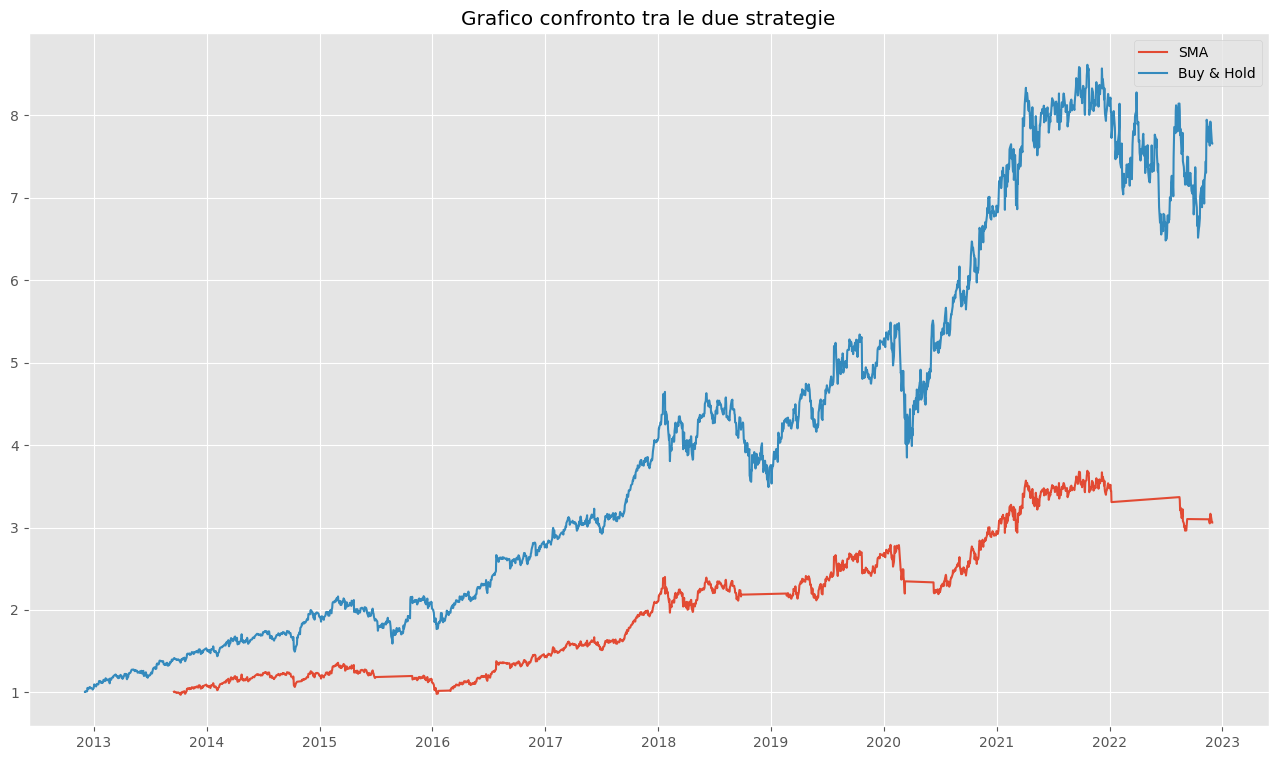

In [101]:
#confronto i ritorni delle due strategie nel tempo
plt.figure(figsize=(16,9))
plt.plot(sma['Return'], label = 'SMA')
plt.plot(TXN['Buy_and_hold'], label = 'Buy & Hold')
plt.legend(loc = 'best')
plt.title('Grafico confronto tra le due strategie')
plt.show()

In [102]:
print("Ritorno strategia Buy_and_hold:", TXN['Buy_and_hold'][-1])  #stampo l'ultimo valore della serie

Ritorno strategia Buy_and_hold: 7.659860254585061


In [103]:
print("Ritorno strategia medie mobili:", sma['Return'][-1])    #stampo l'ultimo valore della serie

Ritorno strategia medie mobili: 3.0604792045996656


CAPM

In [104]:
#calcolo, per ogni azione, il beta rispetto al mercato (SP500)
b1 = yf.download(['TXN', '^GSPC'], start_date, end_date)
b1 = b1['Adj Close']
b1 = b1.rename(columns={'^GSPC':'Market'})\
.resample('M').last().pct_change().dropna() #raggruppo i valori mensilmente considerando, questa volta, l'ultimo valore del mese
covariance = b1.cov().iloc[0,1]             #utilizzo il valore in posizione [0,1] nella matrice della covarianza generata
benchmark_variance = b1.Market.var()
betaTXN = covariance / benchmark_variance   #formula del beta

[*********************100%***********************]  2 of 2 completed


In [105]:
b1 = yf.download(['MSFT', '^GSPC'], start_date, end_date)
b1 = b1['Adj Close']
b1 = b1.rename(columns={'^GSPC':'Market'})\
.resample('M').last().pct_change().dropna()
covariance = b1.cov().iloc[0,1]
benchmark_variance = b1.Market.var()
betaMSFT = covariance / benchmark_variance

[*********************100%***********************]  2 of 2 completed


In [106]:
b1 = yf.download(['JNJ', '^GSPC'], start_date, end_date)
b1 = b1['Adj Close']
b1 = b1.rename(columns={'^GSPC':'Market'})\
.resample('M').last().pct_change().dropna()
covariance = b1.cov().iloc[0,1]
benchmark_variance = b1.Market.var()
betaJNJ = covariance / benchmark_variance

[*********************100%***********************]  2 of 2 completed


In [107]:
b1 = yf.download(['PFE', '^GSPC'], start_date, end_date)
b1 = b1['Adj Close']
b1 = b1.rename(columns={'^GSPC':'Market'})\
.resample('M').last().pct_change().dropna()
covariance = b1.cov().iloc[0,1]
benchmark_variance = b1.Market.var()
betaPFE = covariance / benchmark_variance

[*********************100%***********************]  2 of 2 completed


In [108]:
b1 = yf.download(['MA', '^GSPC'], start_date, end_date)
b1 = b1['Adj Close']
b1 = b1.rename(columns={'^GSPC':'Market'})\
.resample('M').last().pct_change().dropna()
covariance = b1.cov().iloc[0,1]
benchmark_variance = b1.Market.var()
betaMA = covariance / benchmark_variance

[*********************100%***********************]  2 of 2 completed


In [109]:
b1 = yf.download(['JPM', '^GSPC'], start_date, end_date)
b1 = b1['Adj Close']
b1 = b1.rename(columns={'^GSPC':'Market'})\
.resample('M').last().pct_change().dropna()
covariance = b1.cov().iloc[0,1]
benchmark_variance = b1.Market.var()
betaJPM = covariance / benchmark_variance

[*********************100%***********************]  2 of 2 completed


In [110]:
print("Beta TXN:", betaTXN)
print("Beta MSFT:", betaMSFT)
print("Beta JNJ:", betaJNJ)
print("Beta PFE:", betaPFE)
print("Beta MA:", betaMA)
print("Beta JPM:", betaJPM)

Beta TXN: 1.057861943084325
Beta MSFT: 0.9398508941233147
Beta JNJ: 0.6238132574364469
Beta PFE: 0.7589965519321827
Beta MA: 1.1314611559982757
Beta JPM: 1.1646844391985005


In [111]:
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)

start_date = '2012-11-30'
end_date = '2022-11-30'

#elimino i dati in fondo al file
stringa = ' Annual Factors: January-December '  
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']                                     #rinomino le colonne
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")   
factor_df = factor_df.set_index('data')                                                     #definisco la data come indice
factor_df = factor_df[start_date:end_date]                                                  #filtro l'intervallo d'interesse
factor_df.head()

mkt       smb       hml        rf
data                                           
2012-12      1.18      1.50      3.51      0.01
2013-01      5.57      0.33      0.96      0.00
2013-02      1.29     -0.28      0.11      0.00
2013-03      4.03      0.81     -0.19      0.00
2013-04      1.55     -2.36      0.45      0.00

In [112]:
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)                        #divido tutto per 100
factor_df.head()

mkt     smb     hml      rf
data                                   
2012-12  0.0118  0.0150  0.0351  0.0001
2013-01  0.0557  0.0033  0.0096  0.0000
2013-02  0.0129 -0.0028  0.0011  0.0000
2013-03  0.0403  0.0081 -0.0019  0.0000
2013-04  0.0155 -0.0236  0.0045  0.0000

In [113]:
import statsmodels.formula.api as smf
TXN_month_return.index = TXN_month_return.index.strftime('%Y-%m')
TXN_month_return.name = 'rtn'
ff_data = factor_df.join(TXN_month_return)   
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf                 #calcolo i rendimenti in eccesso rispetto al rf dell'azione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit() #stimo il modello
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     15.62
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.37e-08
Time:                        17:28:23   Log-Likelihood:                 212.50
No. Observations:                 119   AIC:                            -417.0
Df Residuals:                     115   BIC:                            -405.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.004      2.970      0.004       0.004       0.019
mkt            0.5261      0.091      5.811      0.000       0.347       0.705
smb            0.2661      0.156      1.710      0.090      -0.042       0.574
hml            0.0471      0.107      0.439      0.662      -0.166       0.260
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.754
Skew:                           0.131   Prob(JB):                        0.686
Kurtosis:                       3.289   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
MSFT_month_return.index = MSFT_month_return.index.strftime('%Y-%m')
MSFT_month_return.name = 'rtn'
ff_data = factor_df.join(MSFT_month_return)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     9.240
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.59e-05
Time:                        17:28:23   Log-Likelihood:                 209.27
No. Observations:                 119   AIC:                            -410.5
Df Residuals:                     115   BIC:                            -399.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0158      0.004      3.941      0.000       0.008       0.024
mkt            0.4695      0.093      5.047      0.000       0.285       0.654
smb           -0.0503      0.160     -0.315      0.754      -0.367       0.266
hml           -0.1277      0.110     -1.157      0.250      -0.346       0.091
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.330
Skew:                           0.022   Prob(JB):                        0.514
Kurtosis:                       3.516   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
JNJ_month_return.index = JNJ_month_return.index.strftime('%Y-%m')
JNJ_month_return.name = 'rtn'
ff_data = factor_df.join(JNJ_month_return)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     7.427
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           0.000137
Time:                        17:28:23   Log-Likelihood:                 242.79
No. Observations:                 119   AIC:                            -477.6
Df Residuals:                     115   BIC:                            -466.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0064      0.003      2.106      0.037       0.000       0.012
mkt            0.3169      0.070      4.516      0.000       0.178       0.456
smb           -0.0942      0.121     -0.781      0.437      -0.333       0.145
hml            0.0880      0.083      1.056      0.293      -0.077       0.253
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.300
Skew:                          -0.018   Prob(JB):                        0.861
Kurtosis:                       2.757   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
PFE_month_return.index = PFE_month_return.index.strftime('%Y-%m')
PFE_month_return.name = 'rtn'
ff_data = factor_df.join(PFE_month_return)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     8.019
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           6.72e-05
Time:                        17:28:23   Log-Likelihood:                 200.00
No. Observations:                 119   AIC:                            -392.0
Df Residuals:                     115   BIC:                            -380.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.004      0.857      0.393      -0.005       0.012
mkt            0.4920      0.101      4.893      0.000       0.293       0.691
smb           -0.2136      0.173     -1.236      0.219      -0.556       0.129
hml            0.0097      0.119      0.081      0.935      -0.227       0.246
==============================================================================
Omnibus:                       15.521   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.382
Skew:                           0.402   Prob(JB):                     2.81e-09
Kurtosis:                       5.701   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
MA_month_return.index = MA_month_return.index.strftime('%Y-%m')
MA_month_return.name = 'rtn'
ff_data = factor_df.join(MA_month_return)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6.122
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           0.000670
Time:                        17:28:23   Log-Likelihood:                 203.64
No. Observations:                 119   AIC:                            -399.3
Df Residuals:                     115   BIC:                            -388.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0126      0.004      2.996      0.003       0.004       0.021
mkt            0.3798      0.098      3.894      0.000       0.187       0.573
smb            0.0849      0.168      0.506      0.614      -0.247       0.417
hml            0.0397      0.116      0.343      0.732      -0.189       0.269
==============================================================================
Omnibus:                        9.741   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.722
Skew:                          -0.487   Prob(JB):                      0.00285
Kurtosis:                       4.190   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
JPM_month_return.index = JPM_month_return.index.strftime('%Y-%m')
JPM_month_return.name = 'rtn'
ff_data = factor_df.join(JPM_month_return)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     24.29
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           3.02e-12
Time:                        17:28:23   Log-Likelihood:                 212.71
No. Observations:                 119   AIC:                            -417.4
Df Residuals:                     115   BIC:                            -406.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0073      0.004      1.868      0.064      -0.000       0.015
mkt            0.4585      0.090      5.074      0.000       0.280       0.638
smb            0.4567      0.155      2.940      0.004       0.149       0.764
hml            0.5088      0.107      4.745      0.000       0.296       0.721
==============================================================================
Omnibus:                        8.888   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.692
Skew:                          -0.596   Prob(JB):                       0.0130
Kurtosis:                       3.575   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
SP500 = yf.download('^GSPC', start_date, end_date)    #scarico l'andamento del prezzo del SP500 durante il periodo richiesto

[*********************100%***********************]  1 of 1 completed


In [120]:
#Stabilisco quanti "n" giorni in avanti voglio prevedere
forecast_out = 252                                                        #giorni lavorativi annui
SP500 = SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)    #elimino le colonne inutilizzate
SP500

Adj Close
Date                   
2012-11-30  1416.180054
2012-12-03  1409.459961
2012-12-04  1407.050049
2012-12-05  1409.280029
2012-12-06  1413.939941
...                 ...
2022-11-22  4003.580078
2022-11-23  4027.260010
2022-11-25  4026.120117
2022-11-28  3963.939941
2022-11-29  3957.629883

[2517 rows x 1 columns]

In [121]:
#costruisco un modello arima per prevere il prezzo del SP500 a un anno
#la migliore combinazione di iperparametri la cerco in base a quella che mi permette di ottenere il minor AIC
def arima_search(df, s):
    p = d = q = range(2)
    p_combinations = list(itertools.product(p, d, q))
    l_aic, pdq, pdqs = None, None, None
    iterations = 0
    for order in p_combinations:
        for (p, q, d) in p_combinations:
            seasonal_order = (p, q, d, s)
            iterations = iterations + 1
            try:
                model = SARIMAX(SP500, order = order,
                               seasonal_order = seasonal_order,
                               enforce_stationarity = False,
                               enforce_invertibility = False,
                               disp = False)
                model_result = model.fit(maxiter = 200, disp = False)
                
                if not l_aic or model_result.aic < l_aic:
                    l_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order
                    
            except Exception as ex:
                continue
    
    return pdq

order = arima_search(SP500, 12)

In [122]:
model = ARIMA(SP500, order = order)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2517
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12358.763
Date:                Thu, 19 Jan 2023   AIC                          24723.525
Time:                        17:31:56   BIC                          24741.017
Sample:                             0   HQIC                         24729.873
                               - 2517                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3912      0.059     -6.624      0.000      -0.507      -0.275
ma.L1          0.2796      0.062      4.486      0.000       0.157       0.402
sigma2      1081.6654     12.601     85.838      0.000    1056.967    1106.363
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             12479.78
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              10.13   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
prediction = model_fit.get_prediction(start= 2517, end = 2517+forecast_out)
prediction_ci = prediction.conf_int()                                    #la previsione mi fornisce due possibili valori futuri,
print("Prezzo minimo previsto a un anno:", prediction_ci.iat[-1, 0])     #li prendo in considerazione entrambi
print("Prezzo massimo previsto a un anno:", prediction_ci.iat[-1, 1])

Prezzo minimo previsto a un anno: 3013.4620675913125
Prezzo massimo previsto a un anno: 4900.059371246097


In [124]:
min_return = (prediction_ci.iat[-1, 0]-SP500.to_numpy()[-1][0])/SP500.to_numpy()[-1][0]    #formula del ritorno semplice netto
max_return = (prediction_ci.iat[-1, 1]-SP500.to_numpy()[-1][0])/SP500.to_numpy()[-1][0]
print("Ritorno semplice netto considerando il prezzo minimo previsto:", min_return)
print("Ritorno semplice netto considerando il prezzo massimo previsto:", max_return)

Ritorno semplice netto considerando il prezzo minimo previsto: -0.23856900295846065
Ritorno semplice netto considerando il prezzo massimo previsto: 0.23812976865938176


In [125]:
min_JNJ_return = betaJNJ * min_return
max_JNJ_return = betaJNJ * max_return
print("Ritorno semplice netto considerando il prezzo minimo previsto dell'azione JNJ:", min_JNJ_return)
print("Ritorno semplice netto considerando il prezzo massimo previsto dell'azione JNJ:", max_JNJ_return)

Ritorno semplice netto considerando il prezzo minimo previsto dell'azione JNJ: -0.14882250685888268
Ritorno semplice netto considerando il prezzo massimo previsto dell'azione JNJ: 0.14854850667999644


*PORTAFOGLIO*

In [126]:
#utilizzo i primi 108 mesi di dati
df1 = df1.resample('M').mean()
df1 = df1.pct_change().dropna()
returns_df1 = df1.head(108)

In [127]:
n_port = 10 ** 5     #numero di combinazioni
n_month = 8.4        #considero il numero di mesi lavorativi effettivi in un anno (considerando 252 giorni lavorativi)

avg_returns = returns_df1.mean() * n_month   #ritorni medi annui
cov_mat = returns_df1.cov() * n_month        #creo la matrice di covarianza

In [128]:
n_assets = 6
np.random.seed(42)
weights = np.random.random(size=(n_port, n_assets))   #utilizzo la funzione random per estrarre le 100000 combinazione
weights /=  np.sum(weights, axis=1)[:, np.newaxis]    #faccio in modo che la somma dei sei valori in ogni vettore sia pari a uno

In [129]:
portf_rtns = np.dot(weights, avg_returns)       #combino i pesi con i ritorni medi e ottengo i ritorni medi di ogni portafoglio

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))  #calcolo la volatilità di ogni portafoglio
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol     #calcolo lo sharpe ratio di ogni portafoglio

In [130]:
#creo un unico dataframe
portf_results_df = pd.DataFrame({'Returns': portf_rtns,
                                 'Volatility': portf_vol,
                                 'Sharpe_ratio': portf_sharpe_ratio})
portf_results_df

Returns  Volatility  Sharpe_ratio
0      0.149993    0.091256      1.643651
1      0.143102    0.095127      1.504317
2      0.156247    0.102791      1.520051
3      0.144327    0.092225      1.564948
4      0.163417    0.094935      1.721346
...         ...         ...           ...
99995  0.142212    0.092397      1.539148
99996  0.146500    0.099648      1.470173
99997  0.161801    0.096610      1.674788
99998  0.157513    0.100066      1.574096
99999  0.151810    0.094419      1.607840

[100000 rows x 3 columns]

In [131]:
#crazione frontiera efficiente
n_points = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.Returns.min(), 
                            portf_results_df.Returns.max(), 
                           n_points)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(n_points):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

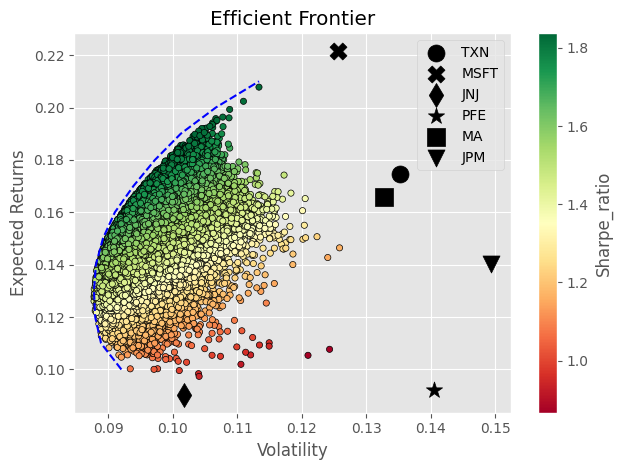

In [132]:
MARKS = ['o', 'X', 'd', '*', 's', 'v']                    #assegno ad ogni azione un simbolo differente da mostrare sul grafico

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='Volatility', 
                      y='Returns', c='Sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKS[asset_index], 
                s=150, 
                color='black',
                label=['TXN', 'MSFT','JNJ','PFE', 'MA', 'JPM'][asset_index])
ax.legend()

plt.tight_layout()
plt.show()

In [133]:
max_sharpe_ind = np.argmax(portf_results_df.Sharpe_ratio)  #ricerca del portafoglio con l'indice di Sharpe più alto
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.Volatility)       #ricerca del portafoglio con la volatilità più bassa
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [134]:
print('Portafoglio con il massimo Sharpe ratio:')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(['TXN', 'MSFT','JNJ','PFE', 'MA', 'JPM'], weights[np.argmax(portf_results_df.Sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)


Portafoglio con il massimo Sharpe ratio:
Performance
Returns: 19.20% Volatility: 10.45% Sharpe_ratio: 183.72% 
Weights
TXN: 15.08% MSFT: 59.54% JNJ: 5.24% PFE: 3.36% MA: 8.99% JPM: 7.78% 

In [135]:
print('Portafoglio con la minore volatilità:')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(['TXN', 'MSFT','JNJ','PFE', 'MA', 'JPM'], weights[np.argmin(portf_results_df.Volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portafoglio con la minore volatilità:
Performance
Returns: 12.78% Volatility: 8.78% Sharpe_ratio: 145.59% 
Weights
TXN: 4.65% MSFT: 11.53% JNJ: 44.79% PFE: 11.47% MA: 17.79% JPM: 9.76% 

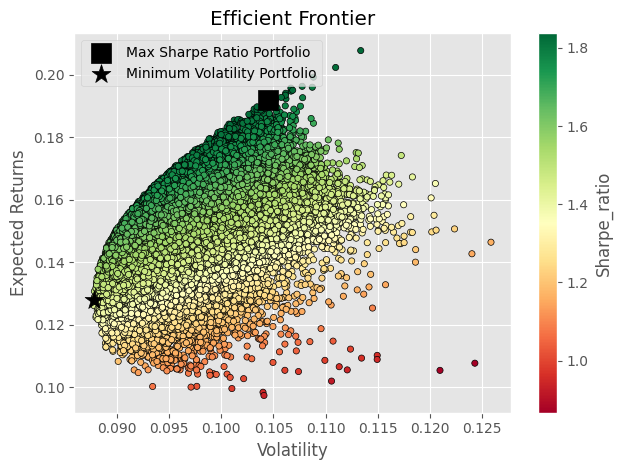

In [136]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='Volatility', 
                      y='Returns', c='Sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.Volatility, 
           y=max_sharpe_portf.Returns, 
           c='black', marker='s', 
           s=200, label='Max Sharpe Ratio Portfolio')
ax.scatter(x=min_vol_portf.Volatility, 
           y=min_vol_portf.Returns, 
           c='black', marker='*', 
           s=200, label='Minimum Volatility Portfolio')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()

plt.show()

In [137]:
#beta del portafoglio ottimale rispetto al mercato s&p500
weight_portfolio_opt = [0.1508, 0.5954, 0.0524, 0.0336, 0.0899, 0.0778]    #riprendo i pesi del portafoglio ottimale
portfolio_opt_return = returns_df1.dot(weight_portfolio_opt)

SP500 = yf.download('^GSPC', start_date, end_date)
SP500_return = SP500['Adj Close'].resample('M').mean().pct_change().dropna()
benchmark_variance = SP500_return.var()
DF = SP500_return.to_frame().join(portfolio_opt_return.to_frame(), lsuffix = "SP500", rsuffix = "PORTFOLIO")
covariance = DF.cov().iloc[0,1]
beta = covariance / benchmark_variance              #formula del beta 
print("Beta:",beta)

[*********************100%***********************]  1 of 1 completed
Beta: 0.8662116303121812


In [138]:
#portfolio effettivo
weight_portfolio = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]  #considero le 6 azioni con i pesi equivalenti (somma = 1)
portfolio_return = returns_df1.dot(weight_portfolio)
avg_returns = portfolio_return.mean() * n_month
print("Ritorni medi annui portafoglio effettivo:", avg_returns)

Ritorni medi annui portafoglio effettivo: 0.1474259698616965


In [139]:
avg_returns_opt = portfolio_opt_return.mean() * n_month
print("Ritorni medi annui portafoglio ottimale:", avg_returns_opt)

Ritorni medi annui portafoglio ottimale: 0.19200569789243374


<AxesSubplot: xlabel='Date'>

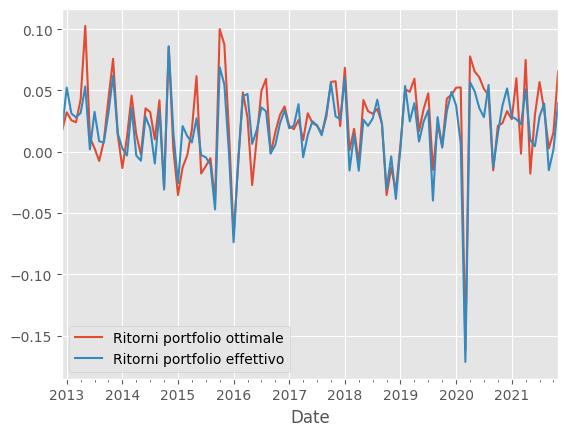

In [140]:
#confronto i due portafogli
portfolio_opt_return.plot(legend=True, grid= True, label='Ritorni portfolio ottimale')
portfolio_return.plot(legend=True, grid= True, label='Ritorni portfolio effettivo')